In [1]:
# -*- coding: utf-8 -*-
# cybos related
import sys
import os
proj_dir = "C:\\Users\\sh\\Documents\\devbox\\github\\auto_invest"
sys.path.append(proj_dir)
from src.utils.database import dbMeta
# math
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta
# visualization with Korean
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_loc = os.path.join(proj_dir, "asset\\BMYEONSUNG_ttf.ttf")
font_name = fm.FontProperties(fname=font_loc).get_name()
font = {
    'family': font_name,
    'weight' : 'bold',
}
mpl.rc('font', **font)  
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

C:\Users\sh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:849: UserWarning: Could not find matplotlibrc; using defaults
  warnings.warn('Could not find matplotlibrc; using defaults')
C:\Users\sh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:1022: UserWarning: could not find rc file; returning defaults
  warnings.warn(message)


In [2]:
sql = """
SELECT 
    * 
FROM cybos.vw_market_eye_yesterday;
"""
engine = dbMeta.get_mysql_engine()
snapshot = pd.read_sql(sql, engine)

C:\Users\sh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pymysql\cursors.py:166: Warning: (1366, "Incorrect string value: '\\xB4\\xEB\\xC7\\xD1\\xB9\\xCE...' for column 'VARIABLE_VALUE' at row 480")
  result = self._query(query)


In [3]:
snapshot = dbMeta.get_today_data()

C:\Users\sh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pymysql\cursors.py:166: Warning: (1366, "Incorrect string value: '\\xB4\\xEB\\xC7\\xD1\\xB9\\xCE...' for column 'VARIABLE_VALUE' at row 480")
  result = self._query(query)


In [4]:
drop_cols = ['SEQ', 'QUERY_DT', 'LOAD_DT', '종목명']
df = snapshot.drop(drop_cols, axis=1, errors='ignore')
df.describe()

시간           대비부호          전일대비           현재가            시가  \
count  156590.000000  156590.000000  156590.00000  1.565900e+05  1.565900e+05   
mean     1240.451427      51.780056    -157.77936  6.596606e+04  6.585115e+04   
std       162.599727       1.423283    2410.07851  1.809906e+05  1.802132e+05   
min         0.000000      48.000000  -22000.00000  2.750000e+02  0.000000e+00   
25%      1114.000000      50.000000    -200.00000  5.820000e+03  5.730000e+03   
50%      1235.000000      53.000000     -20.00000  1.790000e+04  1.750000e+04   
75%      1356.000000      53.000000      50.00000  5.890000e+04  5.760000e+04   
max      1530.000000      53.000000   39000.00000  2.405000e+06  2.387000e+06   

                 고가            저가          매도호가          매수호가           거래량  \
count  1.565900e+05  1.565900e+05  1.565900e+05  1.565900e+05  1.565900e+05   
mean   6.671131e+04  6.523837e+04  6.602833e+04  6.589273e+04  3.345617e+05   
std    1.822622e+05  1.792492e+05  1.810735e+05  1.808897e+05  2.341531e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.940000e+03  5.690000e+03  5.820000e+03  5.800000e+03  1.277650e+04   
50%    1.805000e+04  1.730000e+04  1.795000e+04  1.790000e+04  4.366600e+04   
75%    5.980000e+04  5.760000e+04  5.900000e+04  5.870000e+04  1.454595e+05   
max    2.406000e+06  2.381000e+06  2.405000e+06  2.404000e+06  6.115138e+07   

           ...             ELW_델타      ELW_발행수량        ELW_베가         ELW_세타  \
count      ...       1.565900e+05  1.565900e+05  1.565900e+05  156590.000000   
mean       ...      -3.513762e+07  4.107717e+08 -3.148098e+06   -1069.929861   
std        ...       4.263449e+08  1.027820e+09  4.630826e+08   40731.615279   
min        ...      -2.123235e+09  0.000000e+00 -2.130706e+09 -203162.000000   
25%        ...       0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
50%        ...       0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
75%        ...       0.000000e+00  1.677719e+07  1.000000e+00       0.000000   
max        ...       2.102985e+09  4.294967e+09  2.139488e+09  200127.000000   

          ELW_손익분기율    ELW_역사적변동성     ELW_자본지지점       ELW_패리티      ELW_프리미엄  \
count  1.565900e+05  1.565900e+05  1.565900e+05  1.565900e+05  1.565900e+05   
mean   7.615998e+05  3.954025e+04 -4.383344e+04  7.877700e+05 -5.714895e+03   
std    5.319204e+06  5.045640e+06  4.257206e+06  5.291534e+06  4.998971e+06   
min   -2.147484e+07 -2.147405e+07 -2.130706e+07 -2.147484e+07 -2.130706e+07   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    6.550000e+02  0.000000e+00  0.000000e+00  2.960000e+02  1.000000e+00   
max    2.106655e+07  2.130785e+07  2.080375e+07  2.113929e+07  2.130708e+07   

            ELW_베리어  
count  1.565900e+05  
mean  -1.264316e+05  
std    4.372186e+06  
min   -2.143158e+07  
25%    0.000000e+00  
50%    0.000000e+00  
75%    5.600000e+01  
max    2.130706e+07  

[8 rows x 138 columns]

In [8]:
from sklearn.preprocessing import StandardScaler

def get_stock_name(code):
    ix = snapshot[snapshot['종목코드'] == code].index.tolist()[0]
    return snapshot[snapshot['종목코드'] == code]['종목명'][ix]

def normalize_series(series):
    values = series.values
    values = values.reshape((len(values), 1))
    scaler = StandardScaler()
    scaler = scaler.fit(values)
    normalized = scaler.transform(values)
    return normalized

def get_time_derivative(df, code, col):
    if df.index.names[0] == '시간':
        df['time_in_min'] = pd.Series(list(map(lambda x: int(str(x)[:-2]) * 60 + int(str(x)[-2:]), df.index.tolist())))
    else:
        df['time_in_min'] = df['시간'].apply(lambda x: int(str(x)[:-2]) * 60 + int(str(x)[-2:]))
    df['dt'] = df['time_in_min'].diff()
    df['col_dt'] = df[col].diff()
    c_name = 'deriv_%s' % col
    df[c_name] = df['col_dt'] / df['dt']
    df.drop(['time_in_min', 'dt', 'col_dt'], inplace=True, errors='ignore')
    df = df.fillna(0)
    return (df, c_name)

C:\Users\sh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


코오롱머티리얼: A144620


C:\Users\sh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


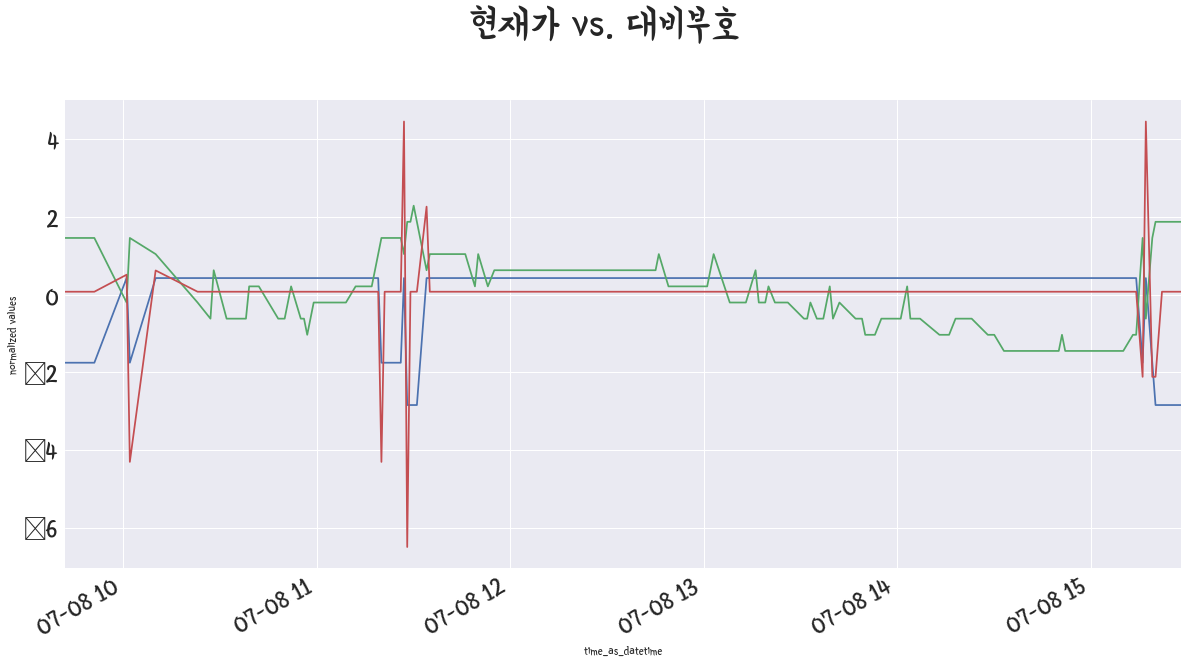

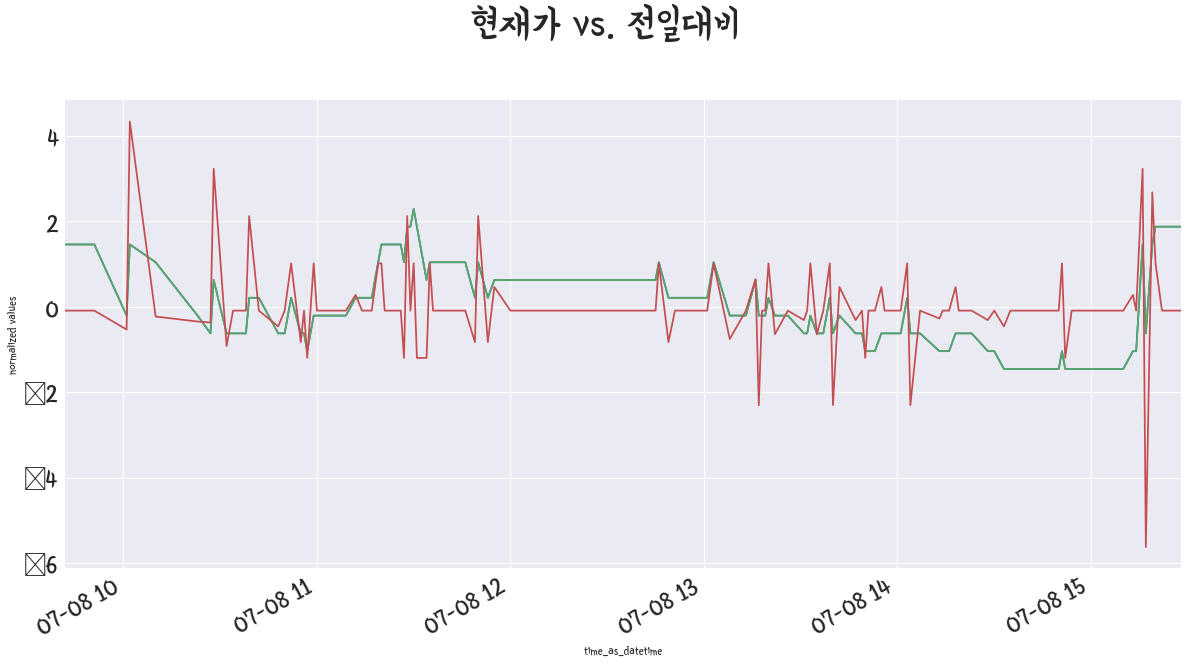

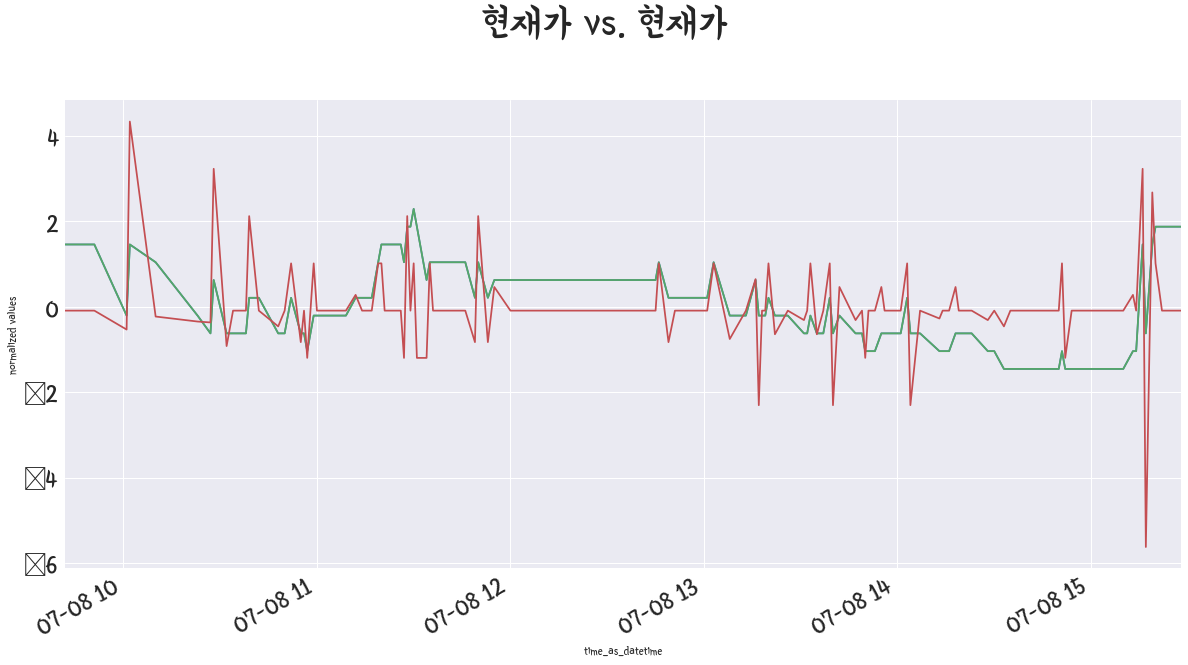

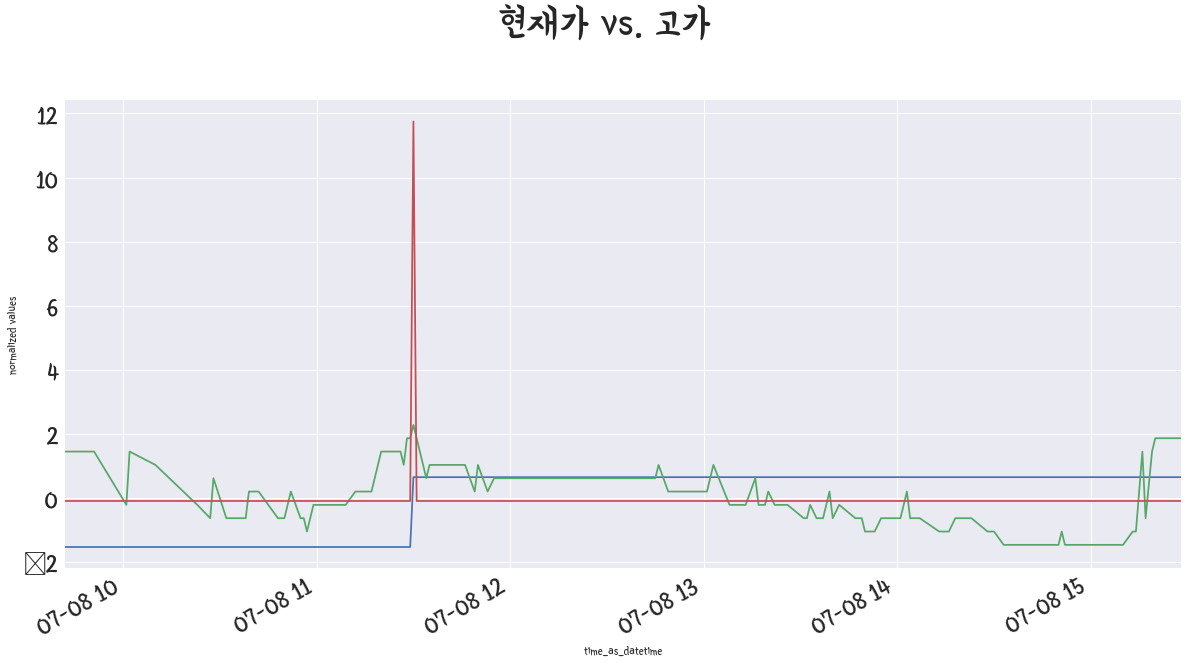

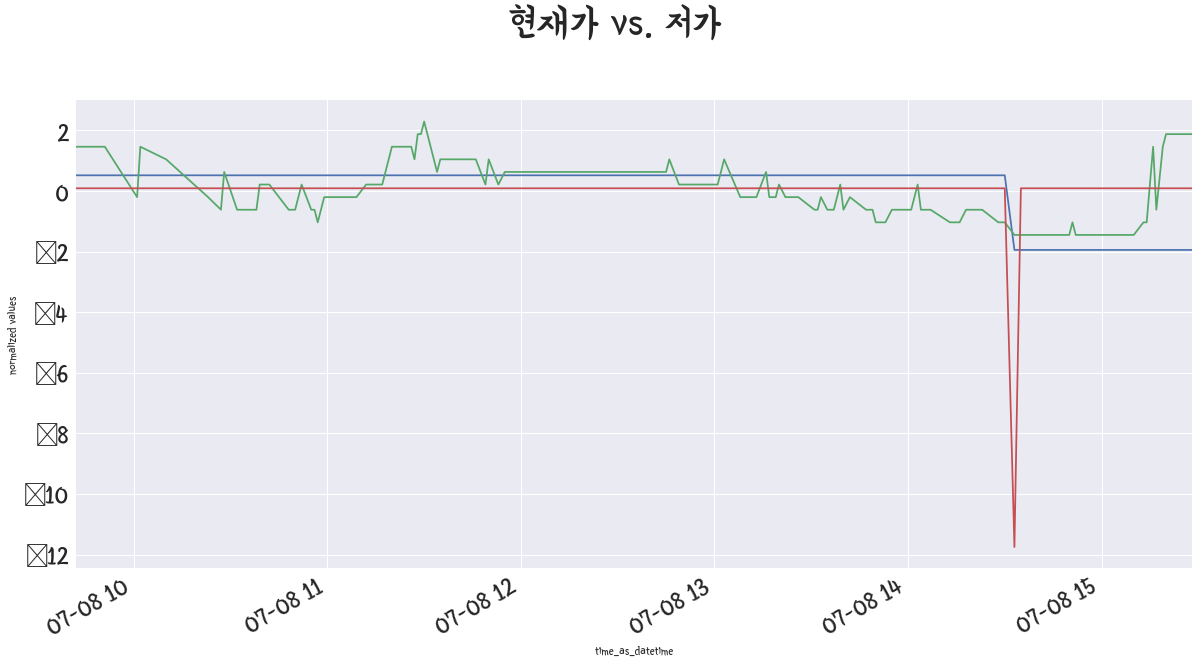

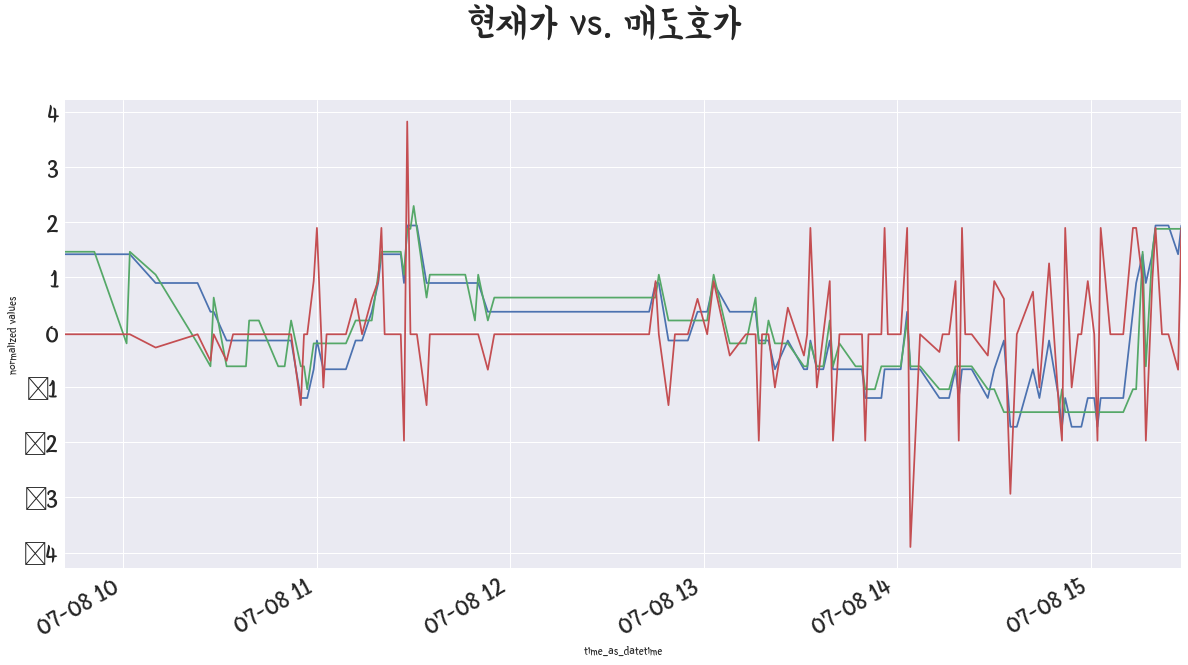

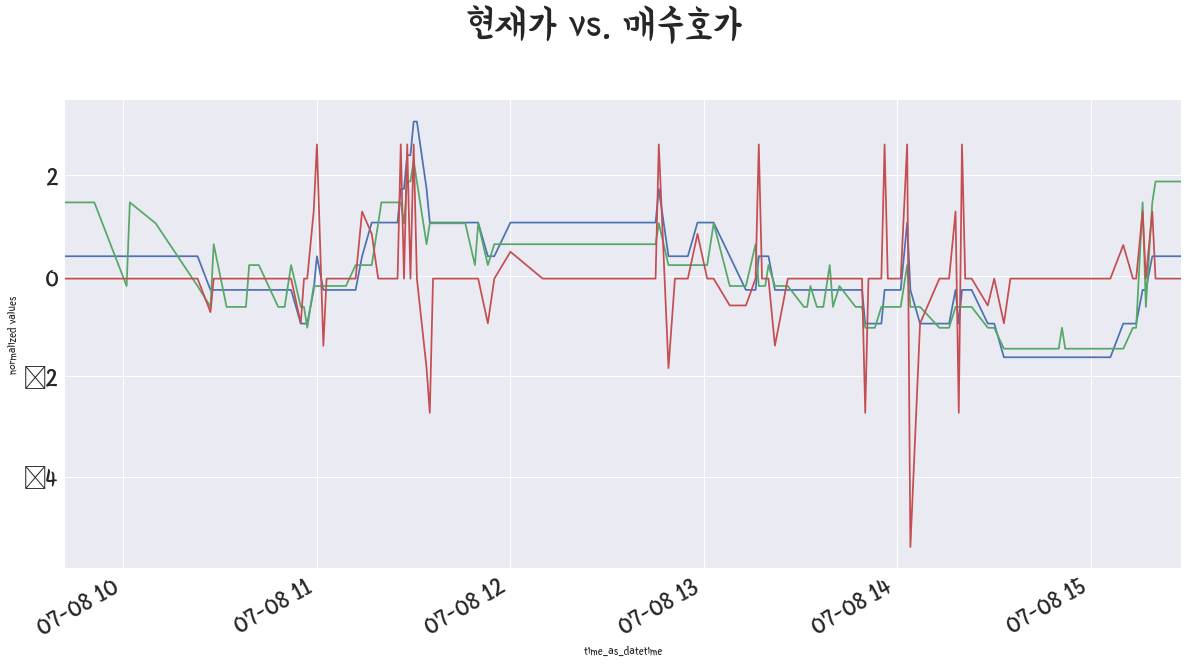

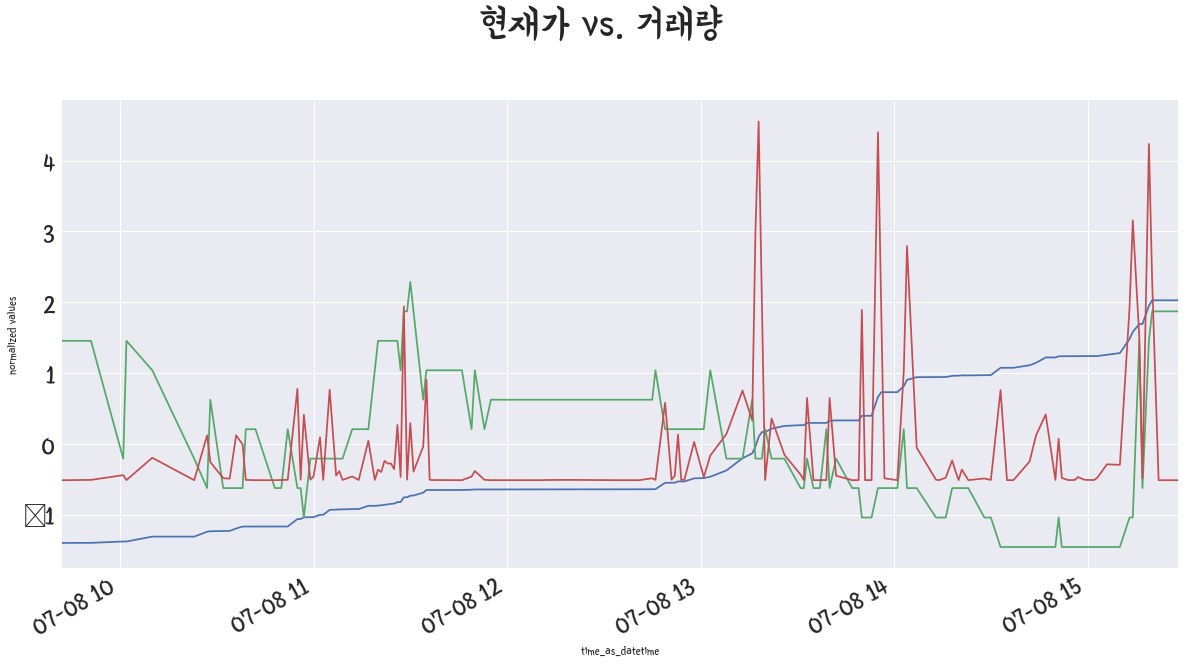

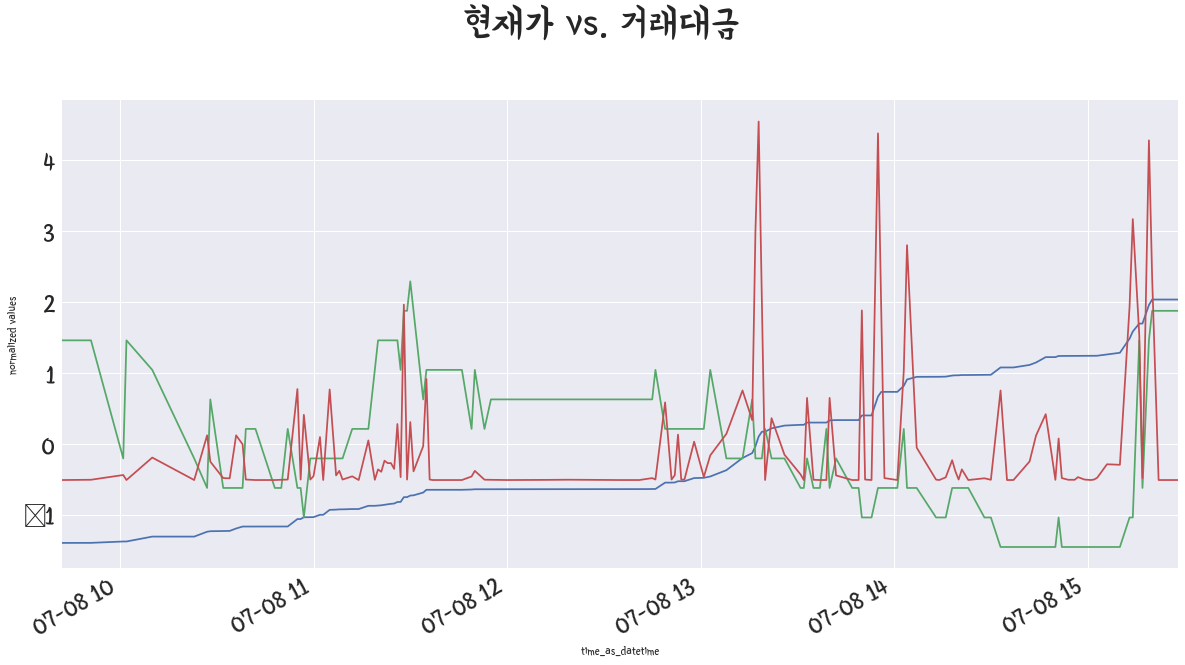

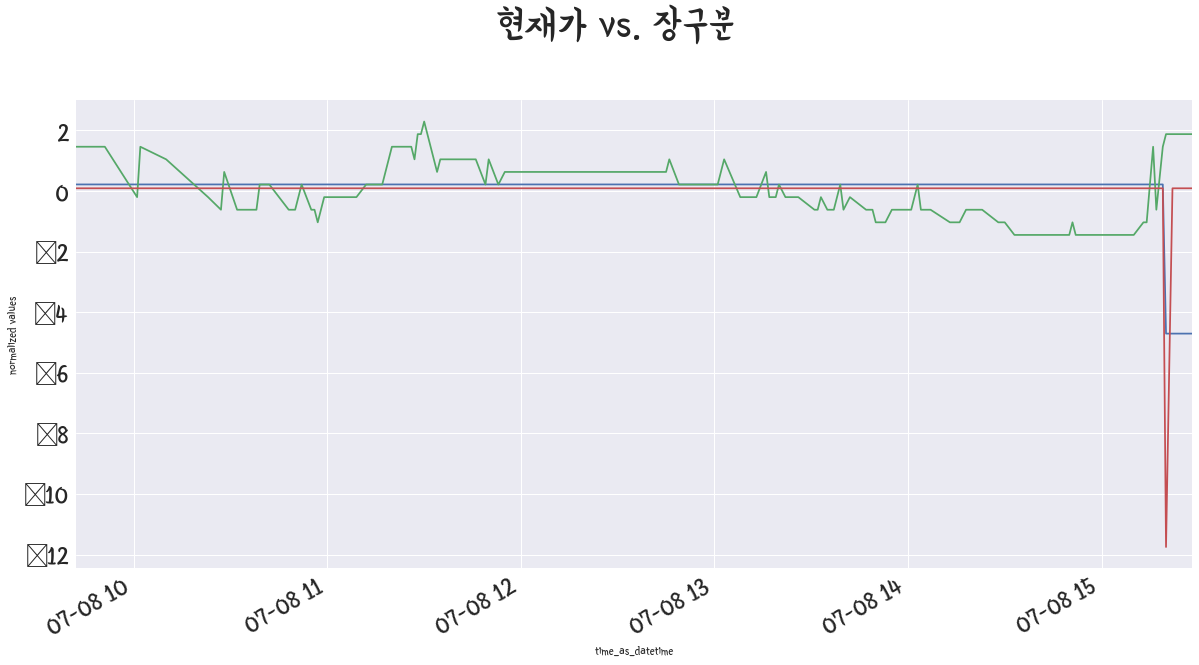

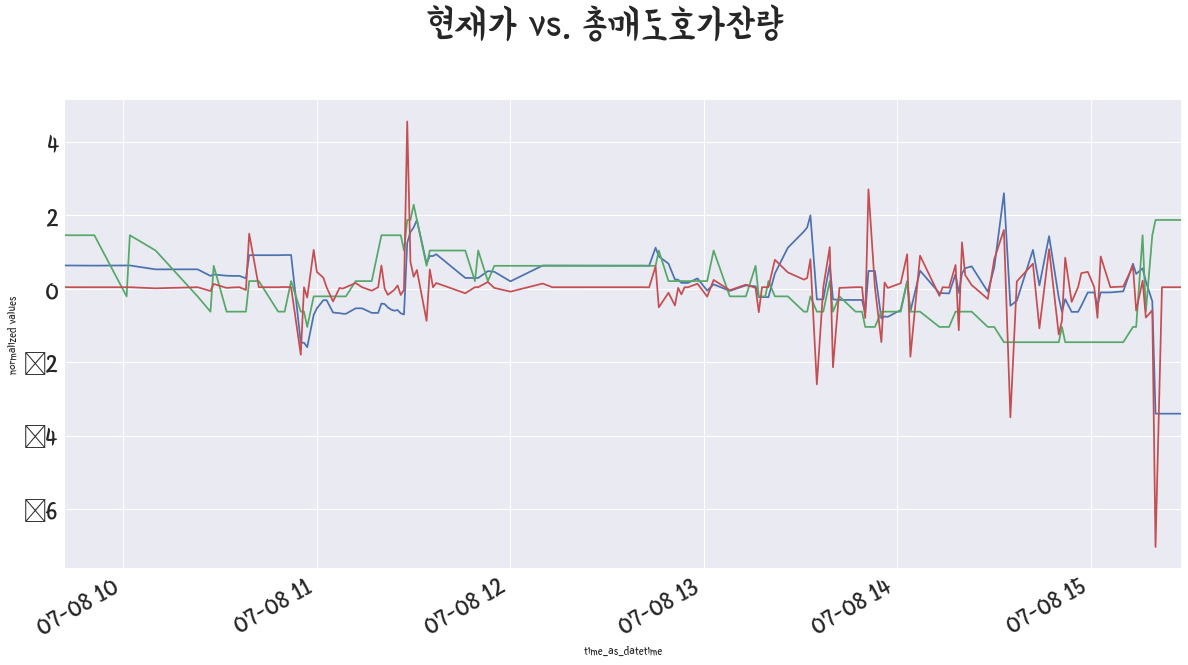

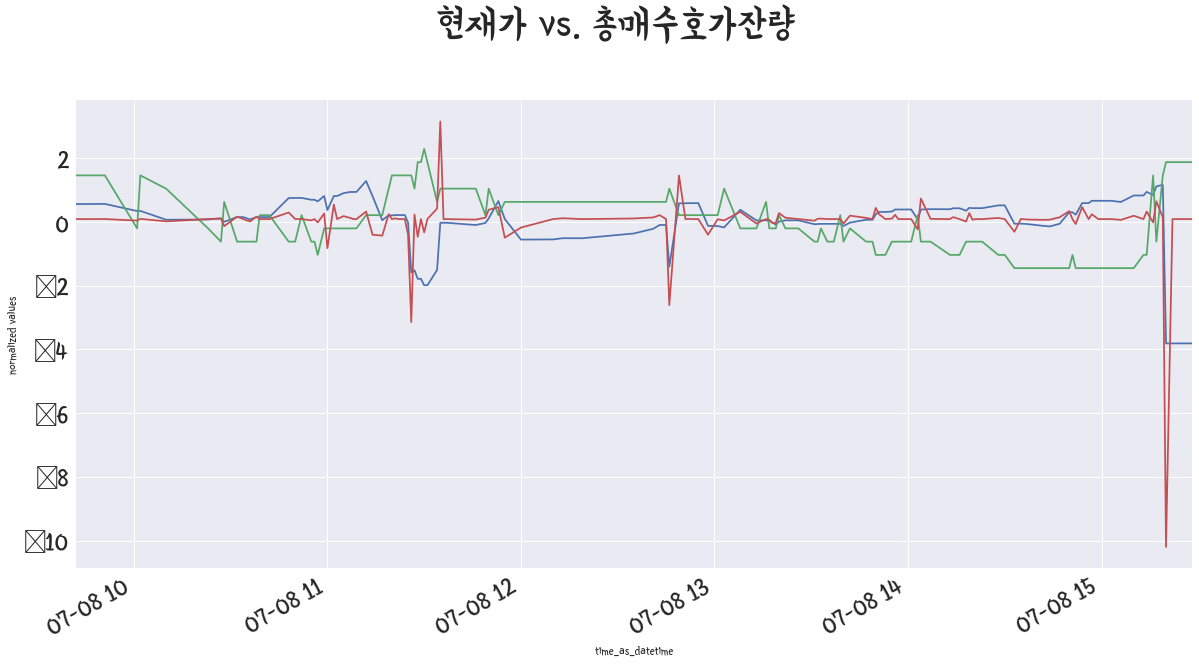

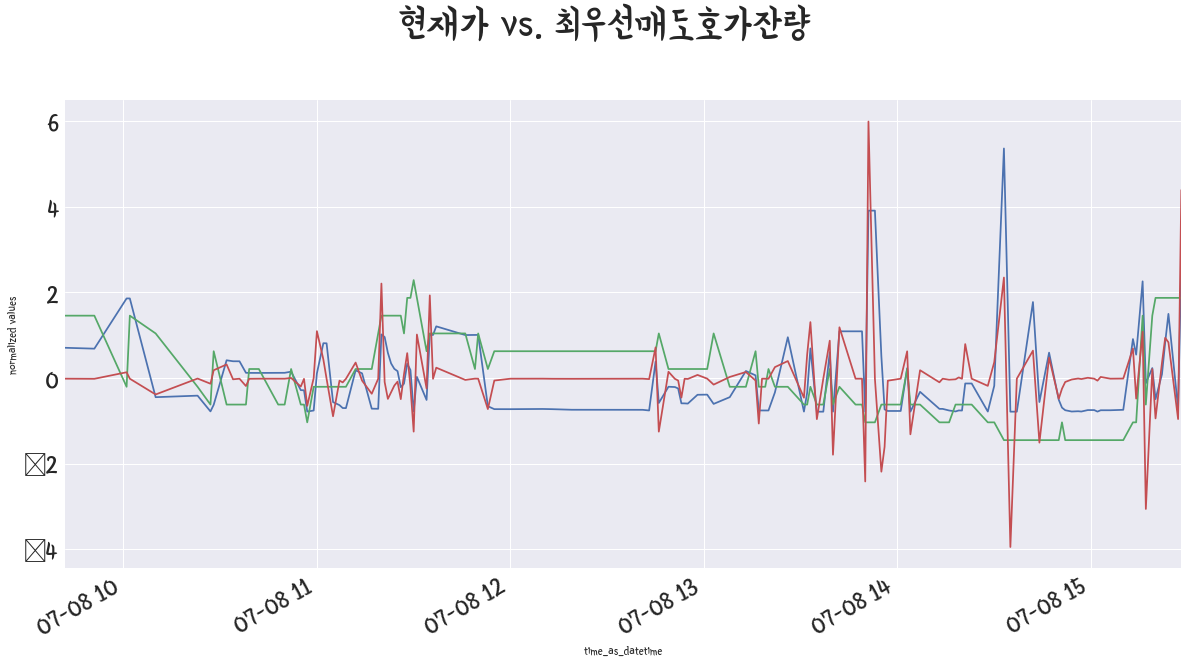

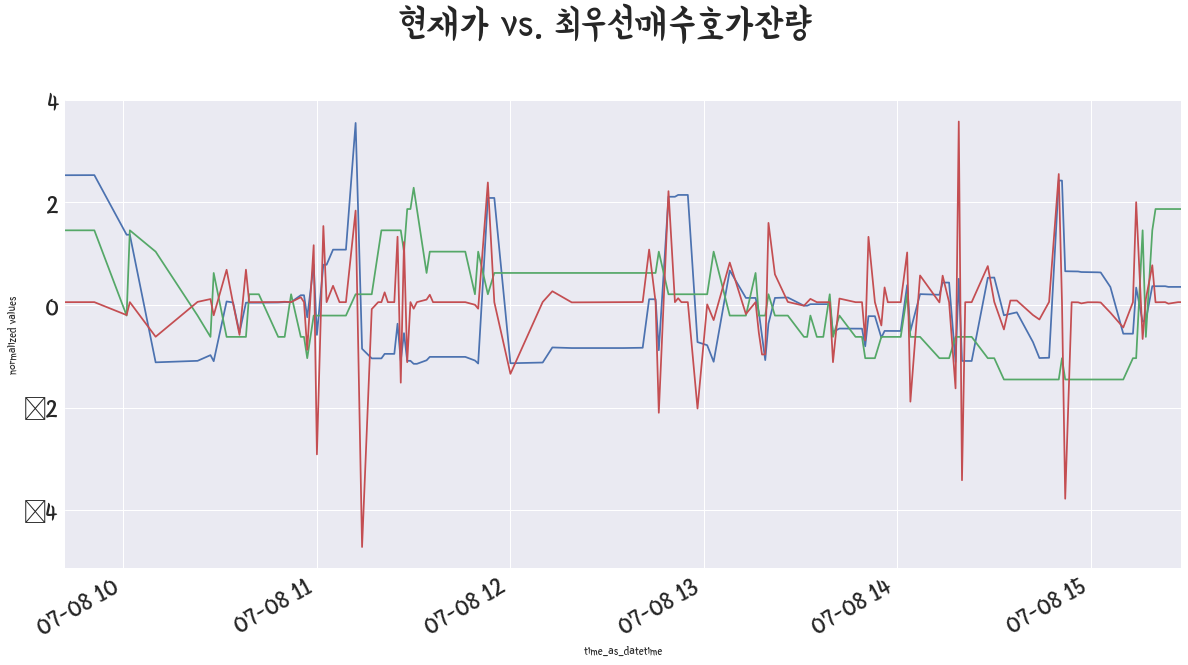

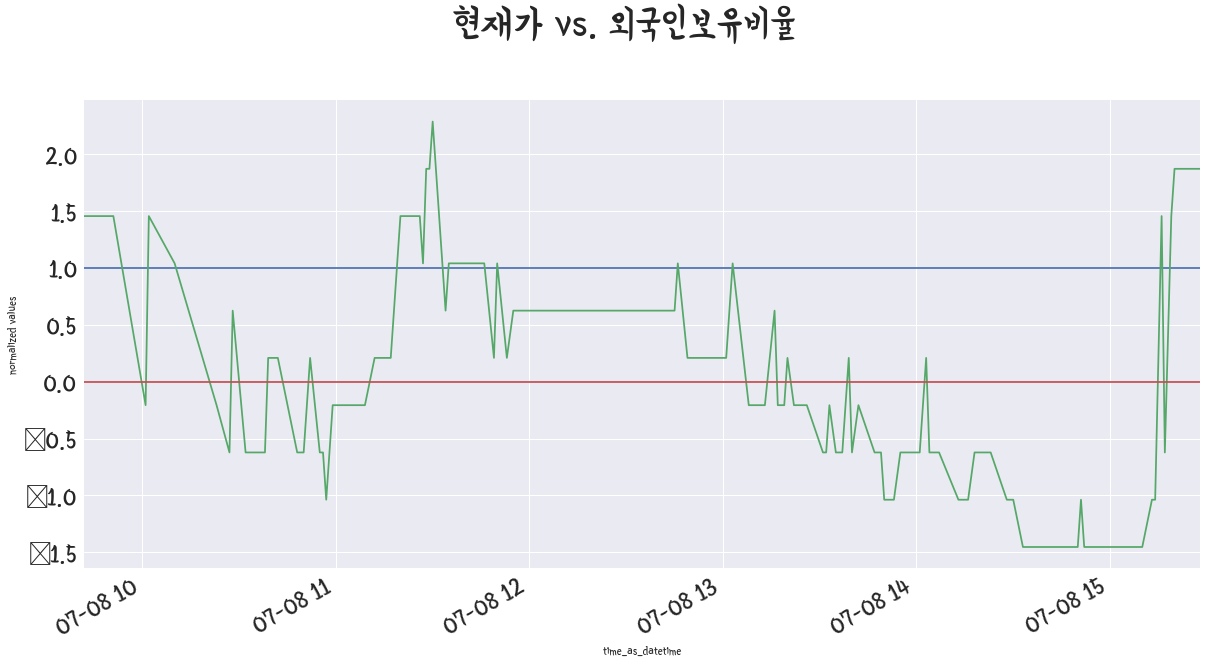

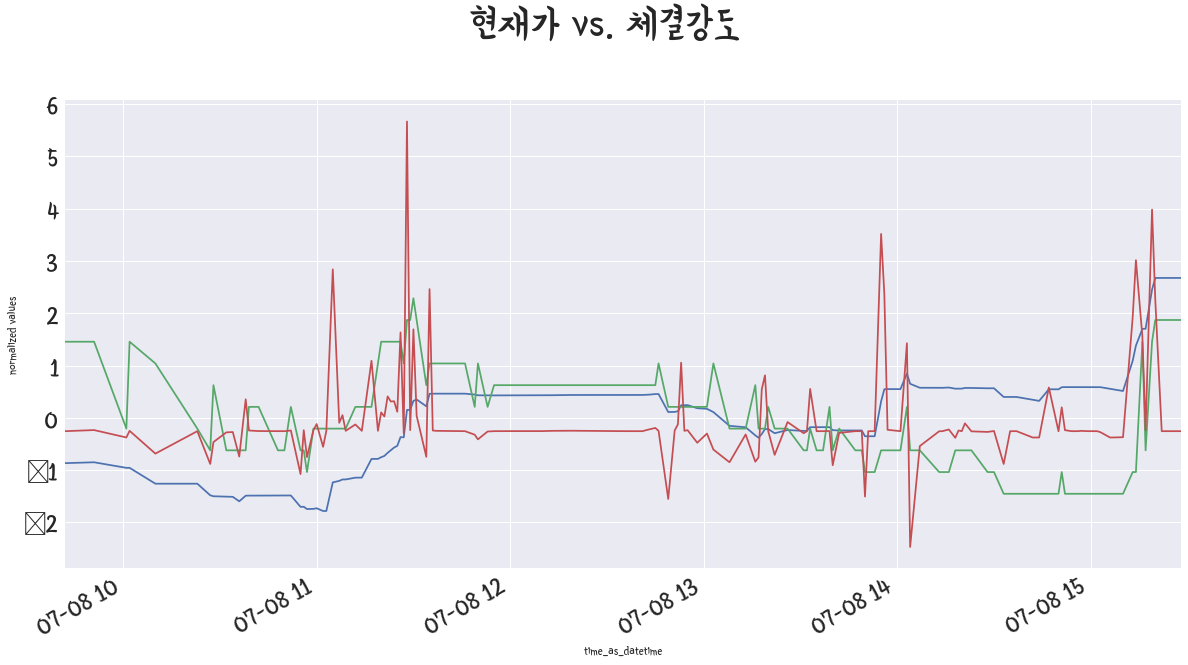

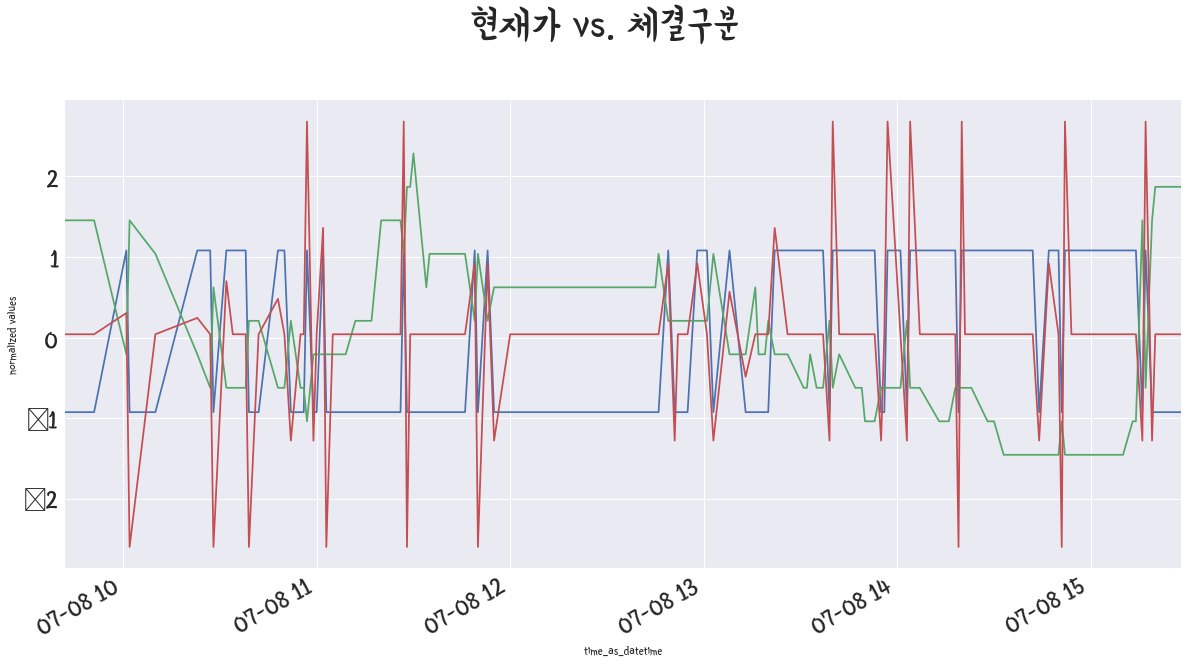

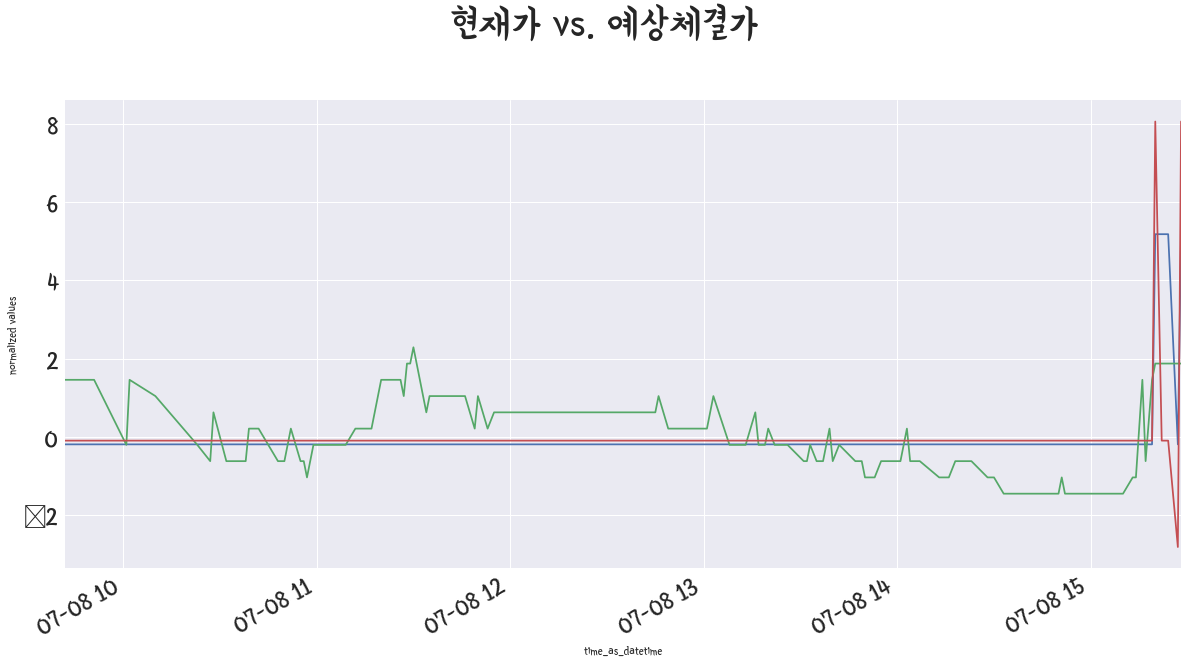

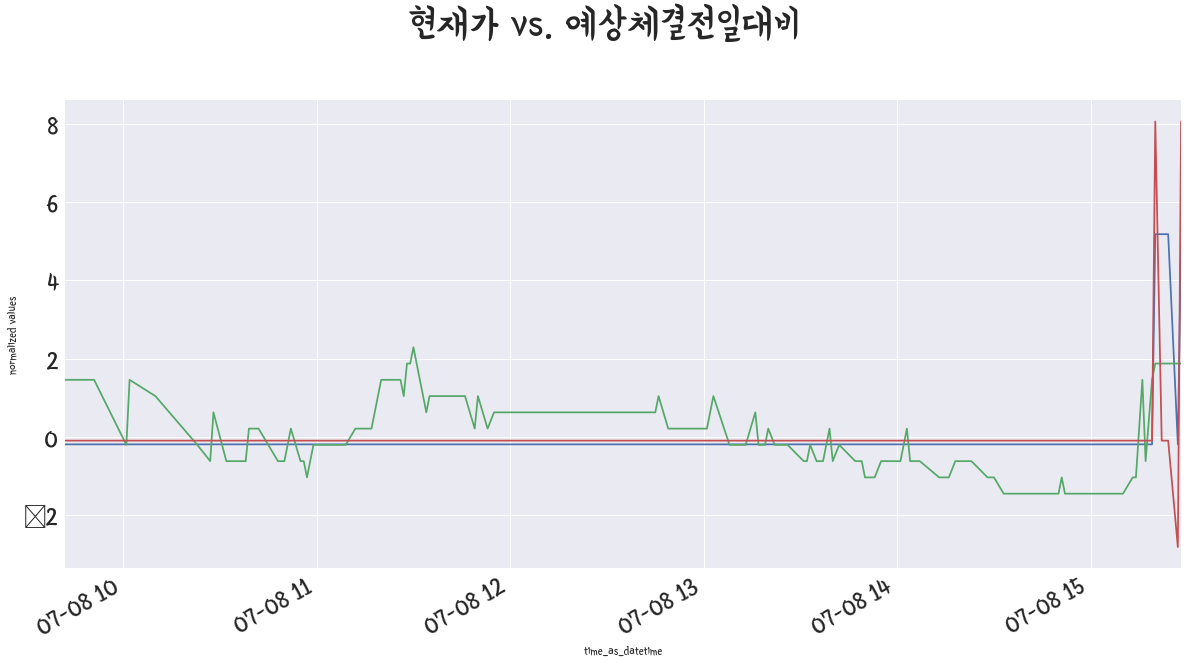

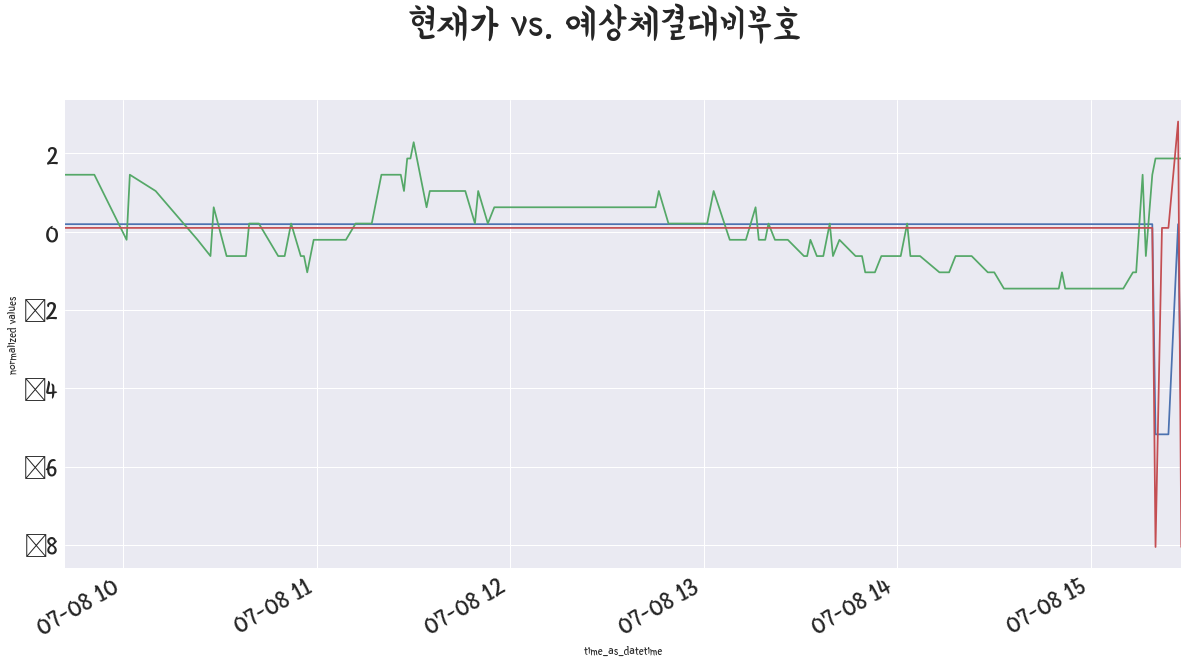

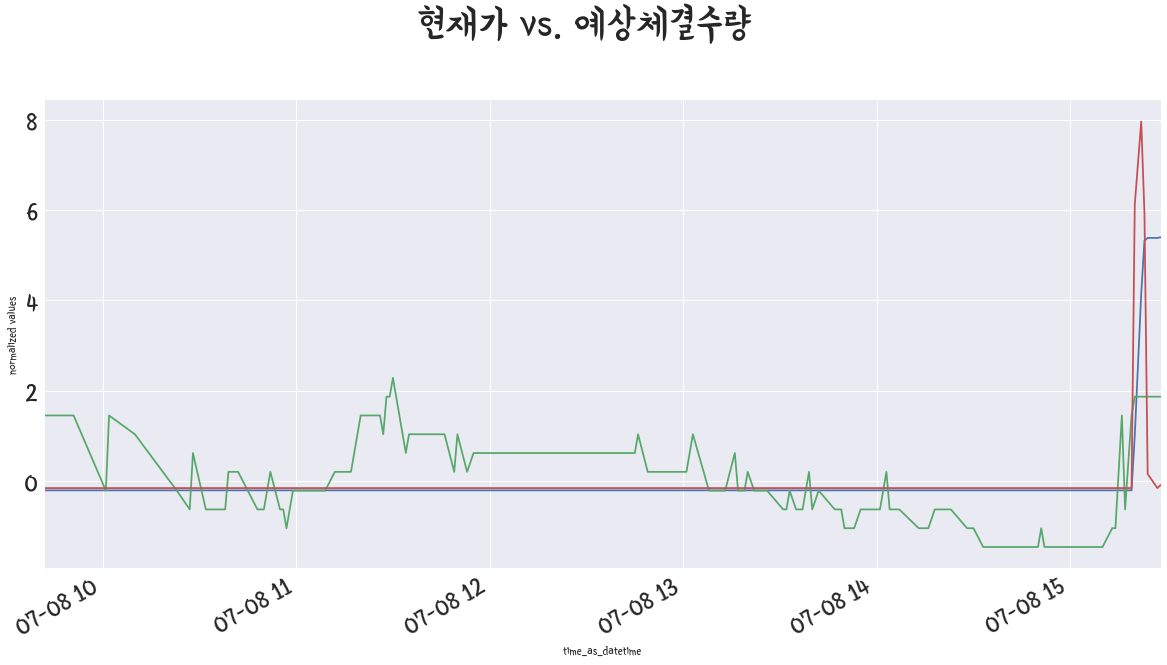

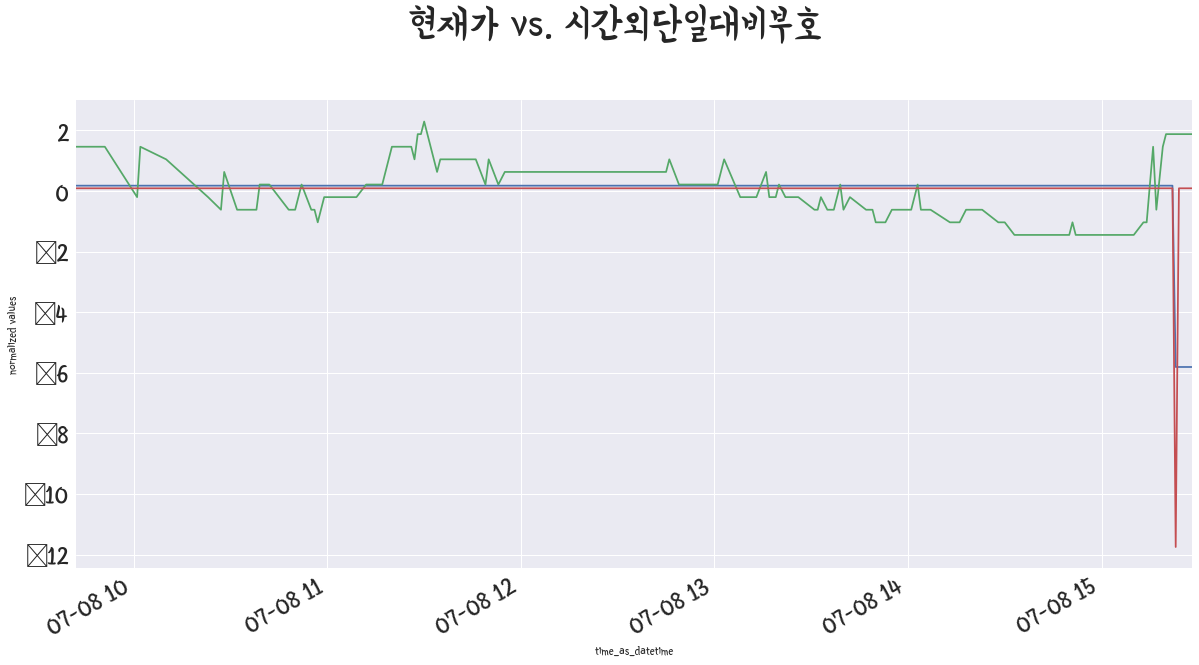

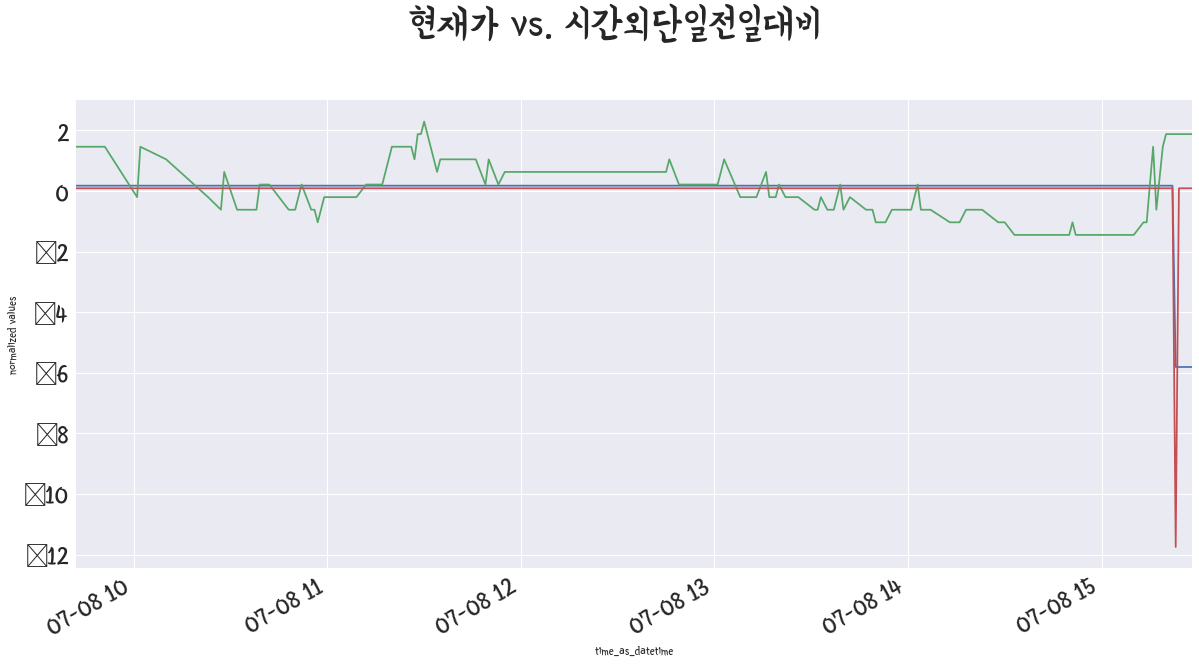

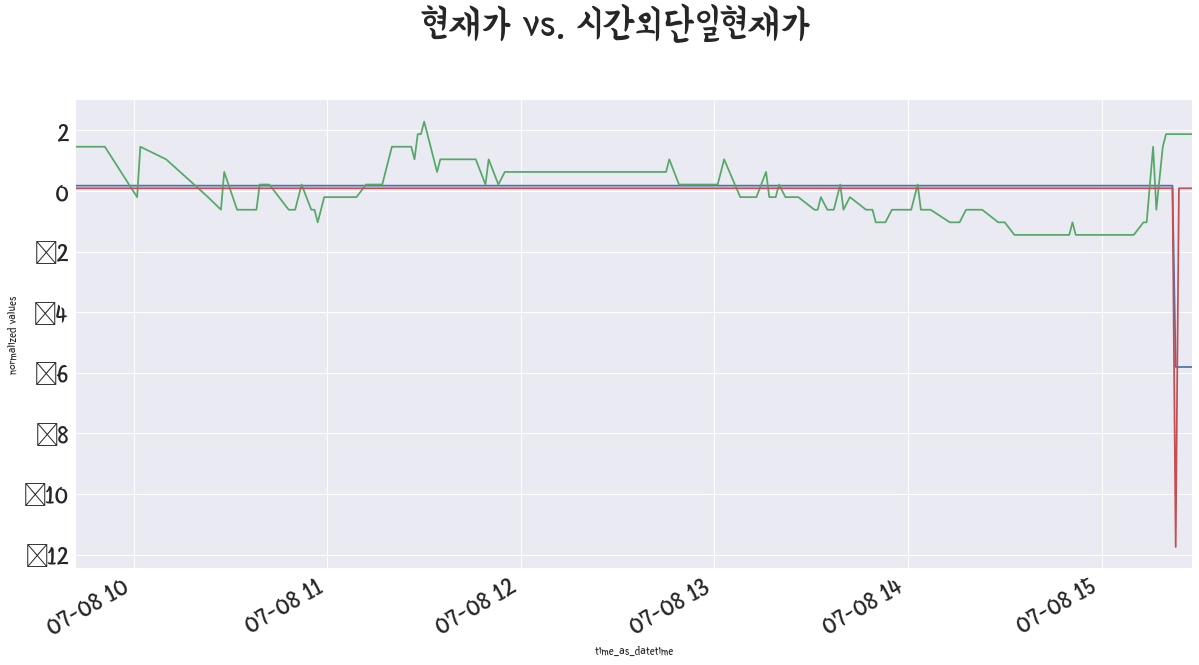

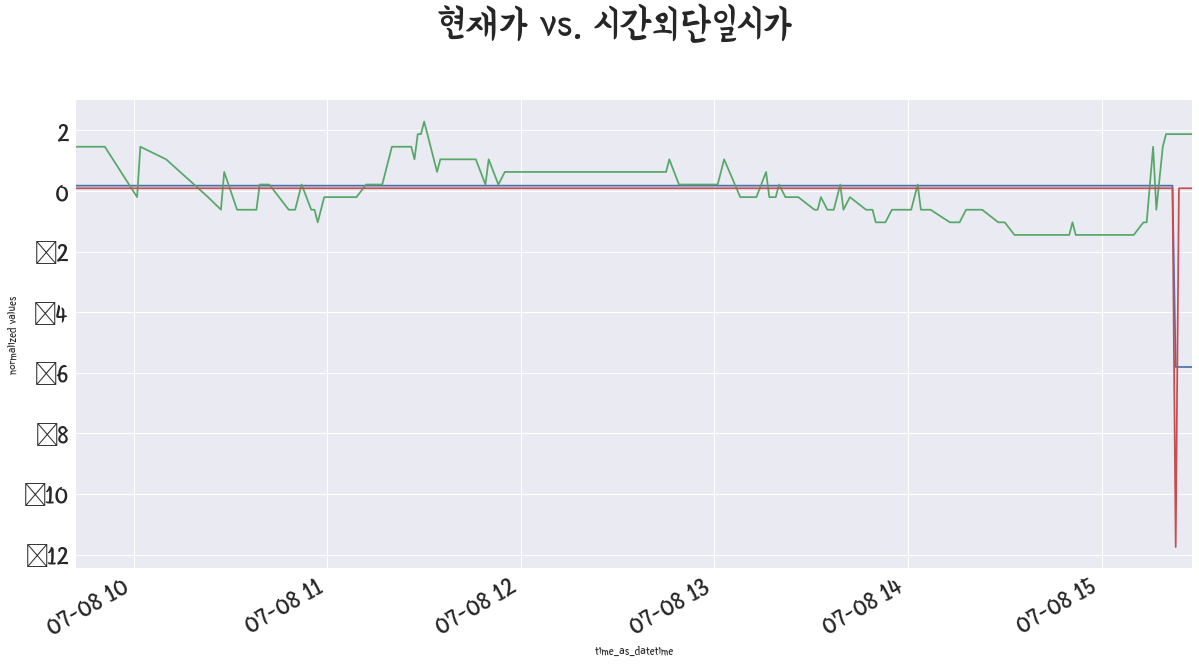

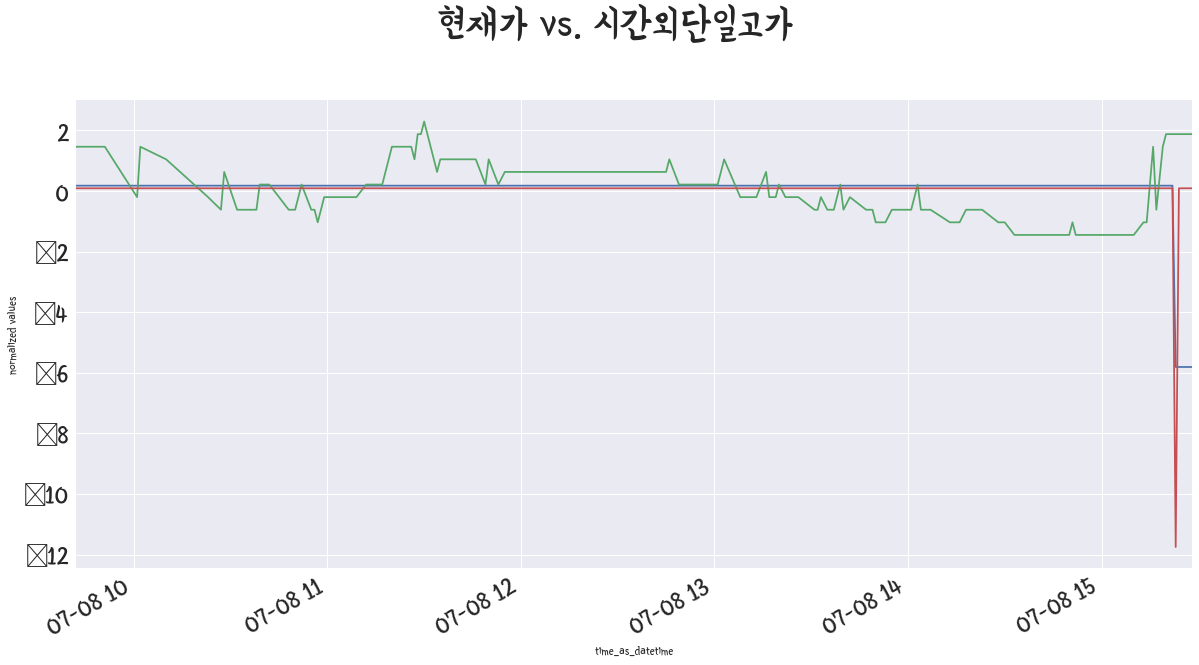

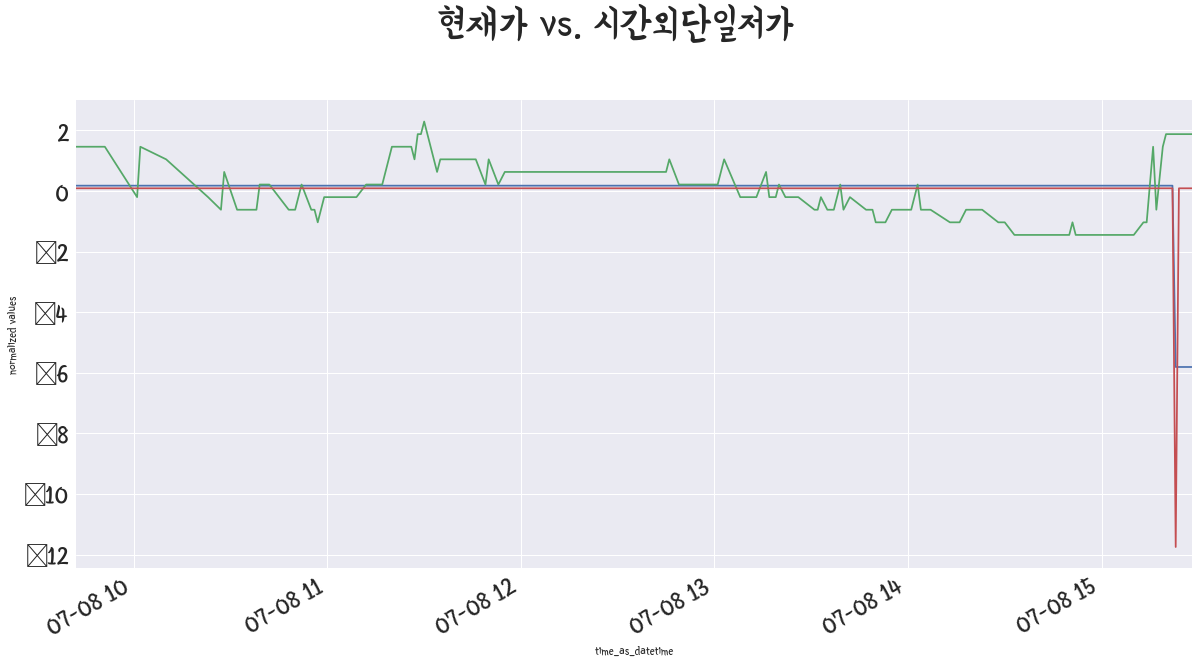

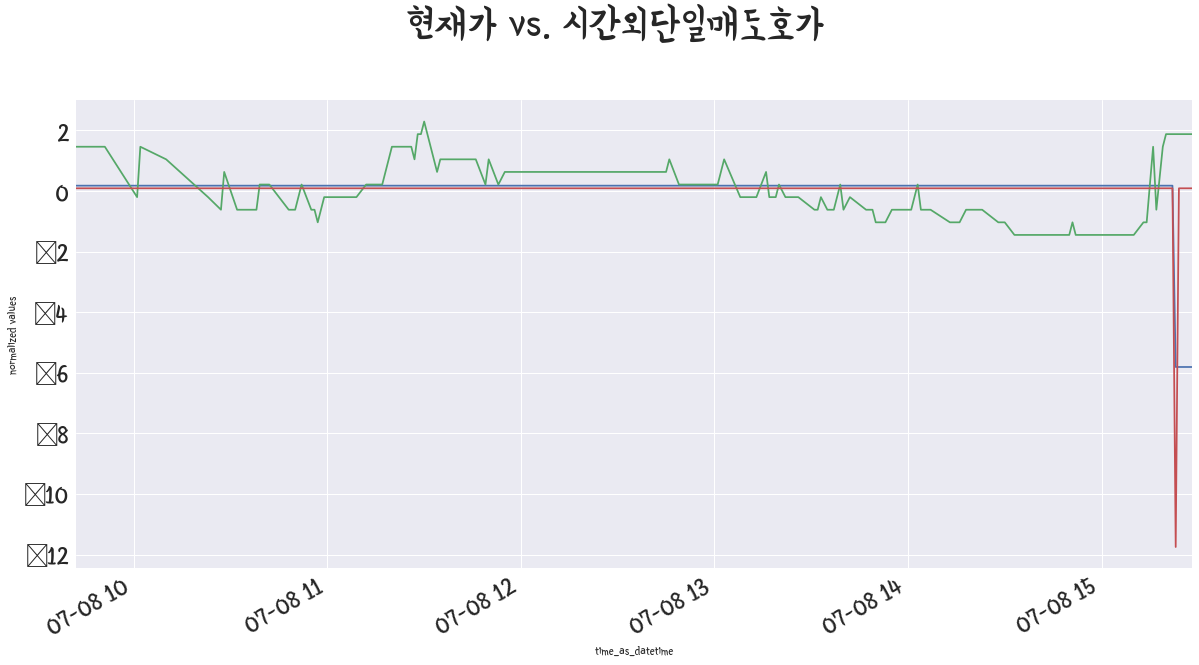

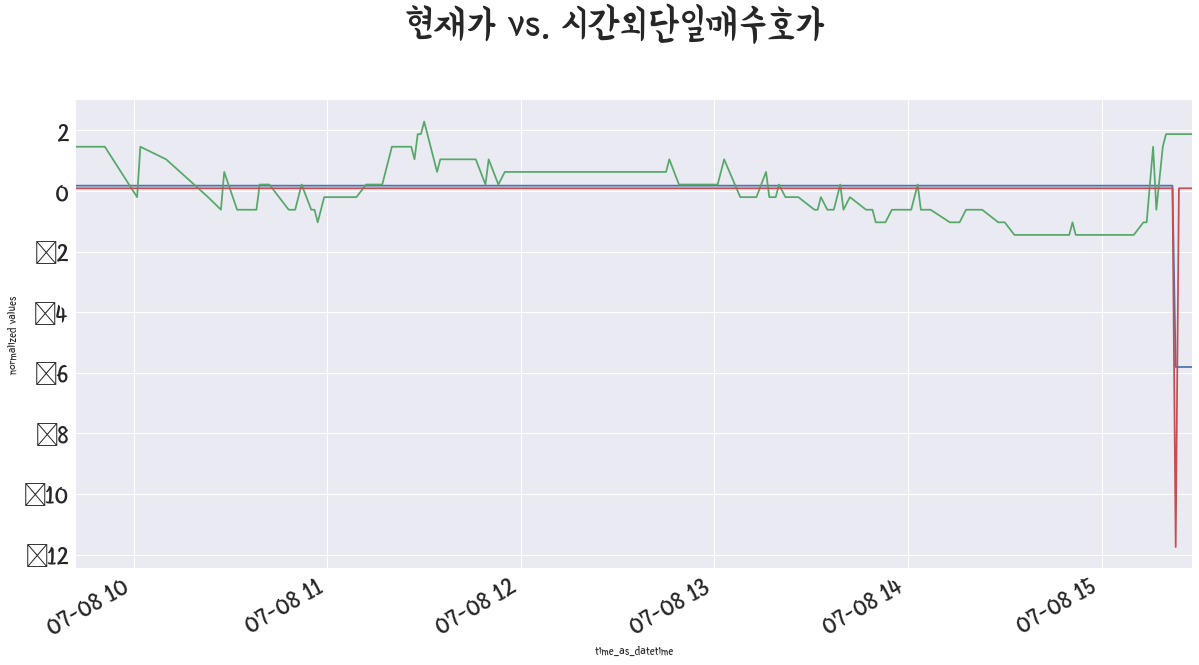

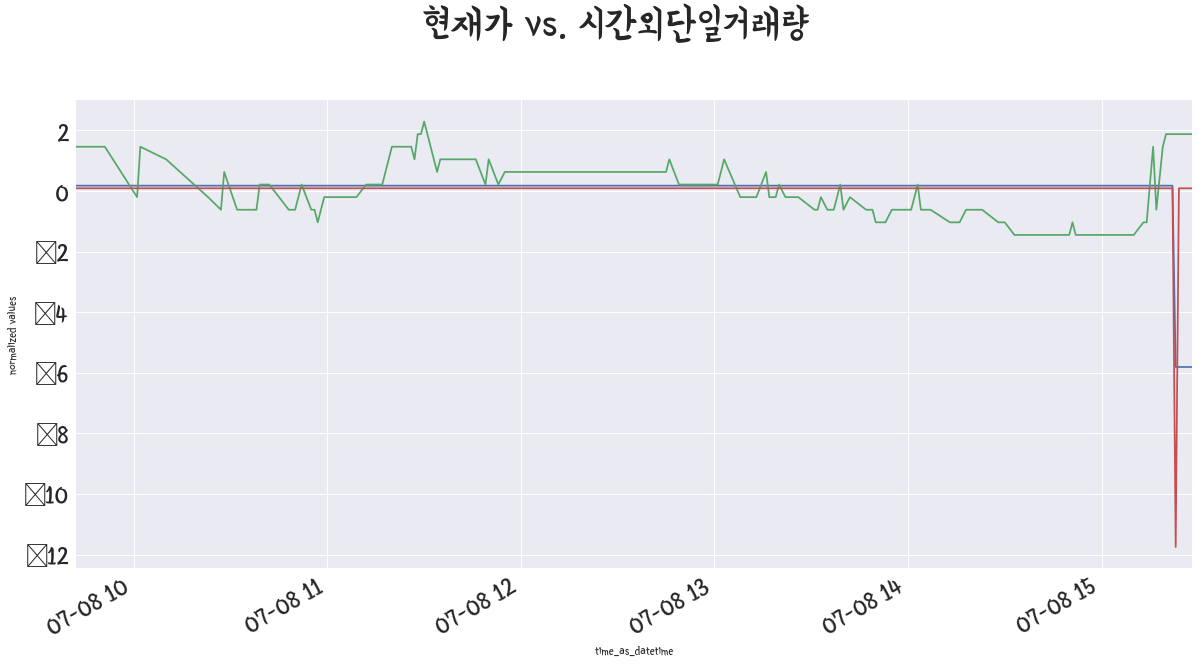

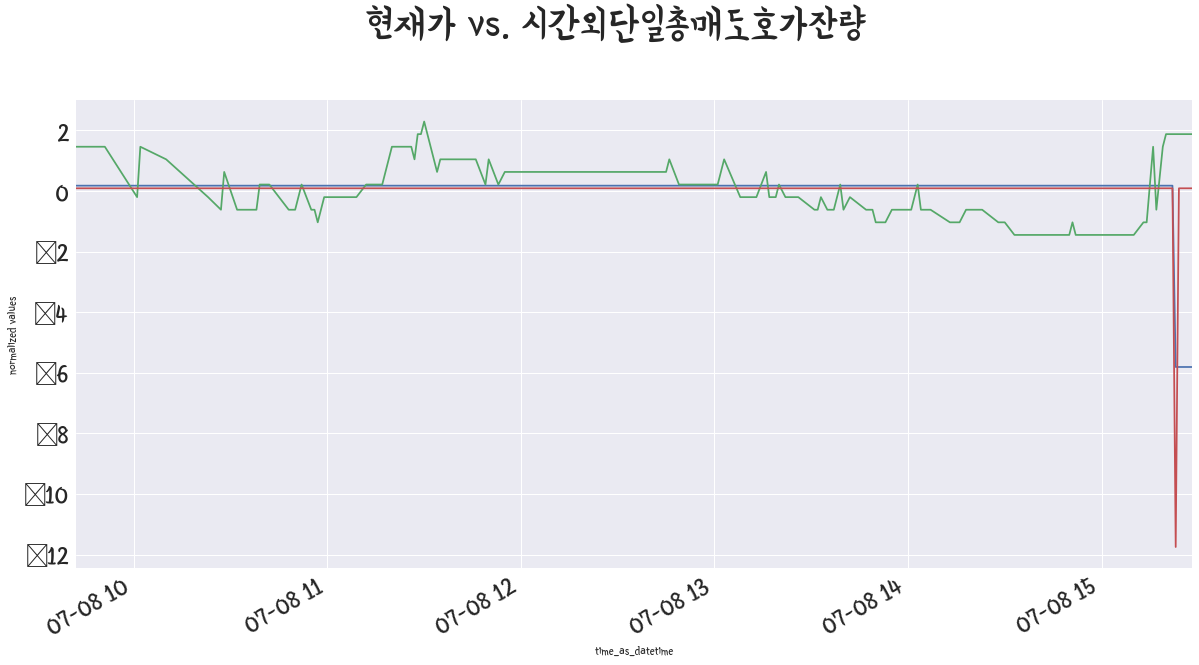

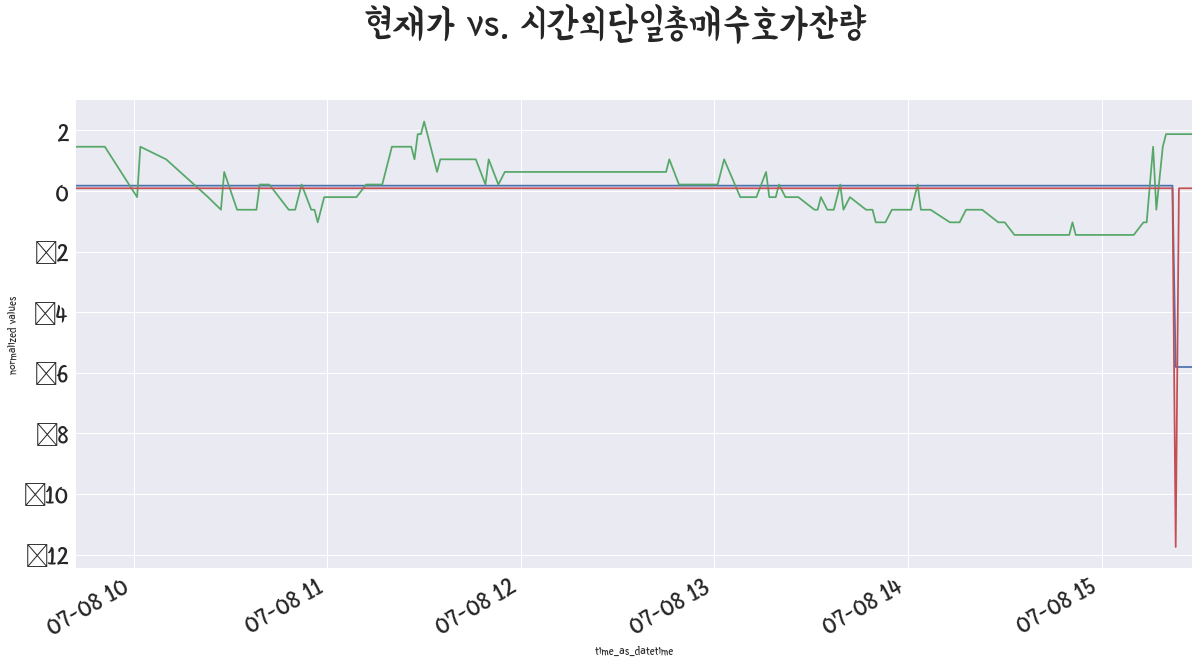

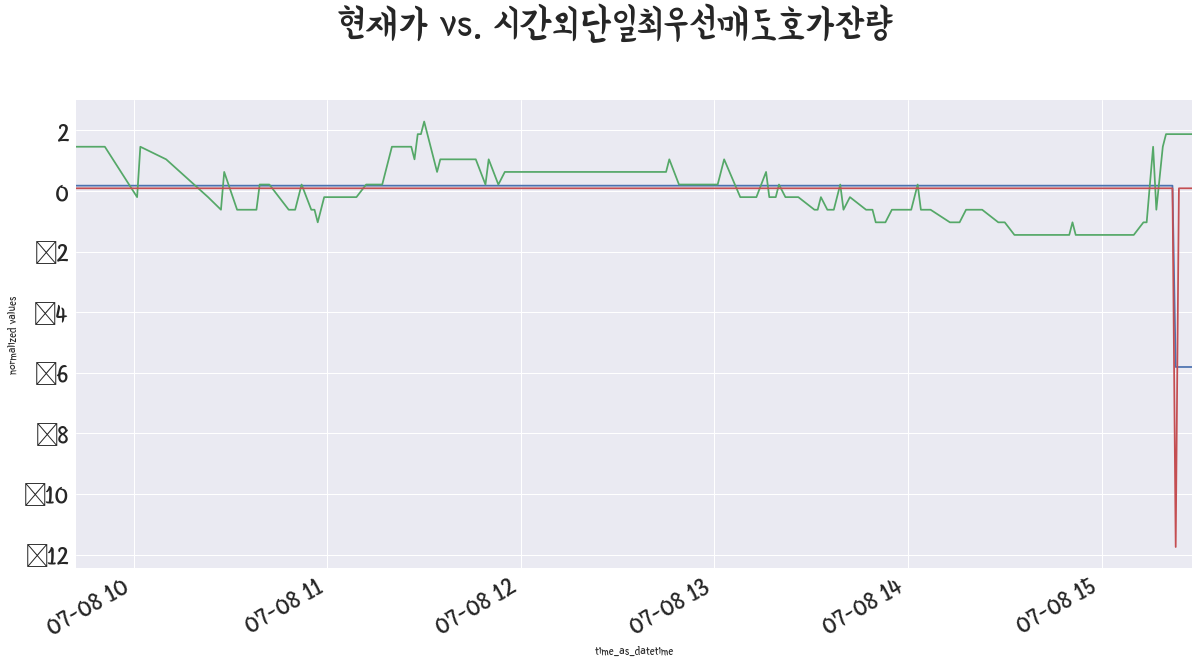

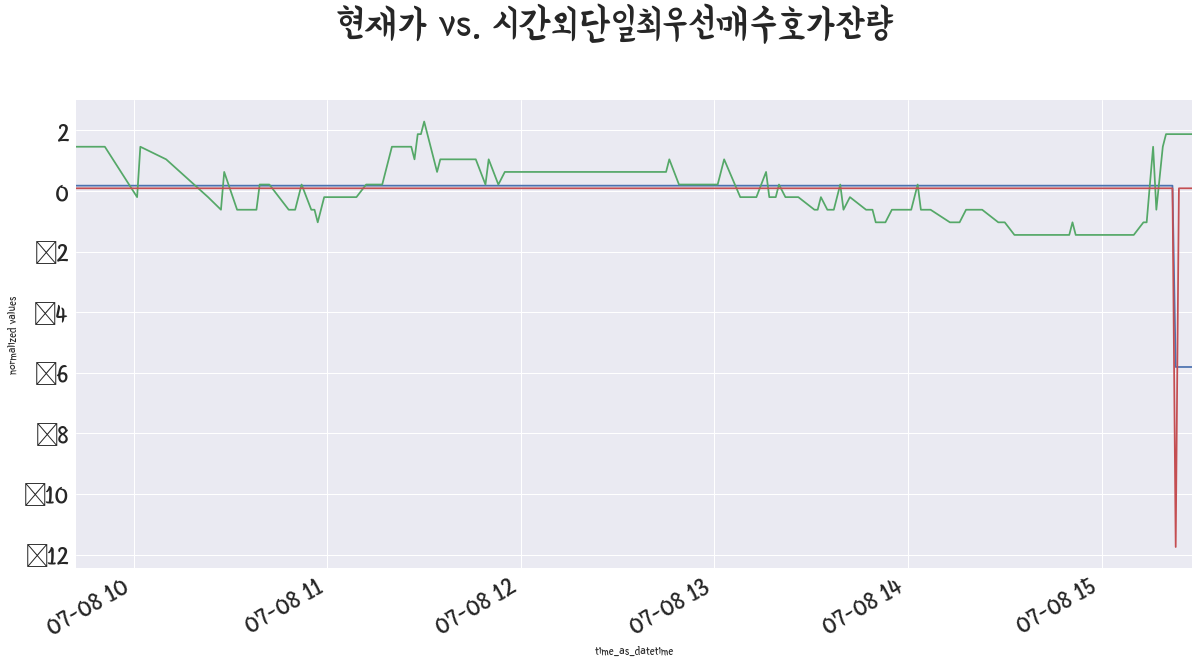

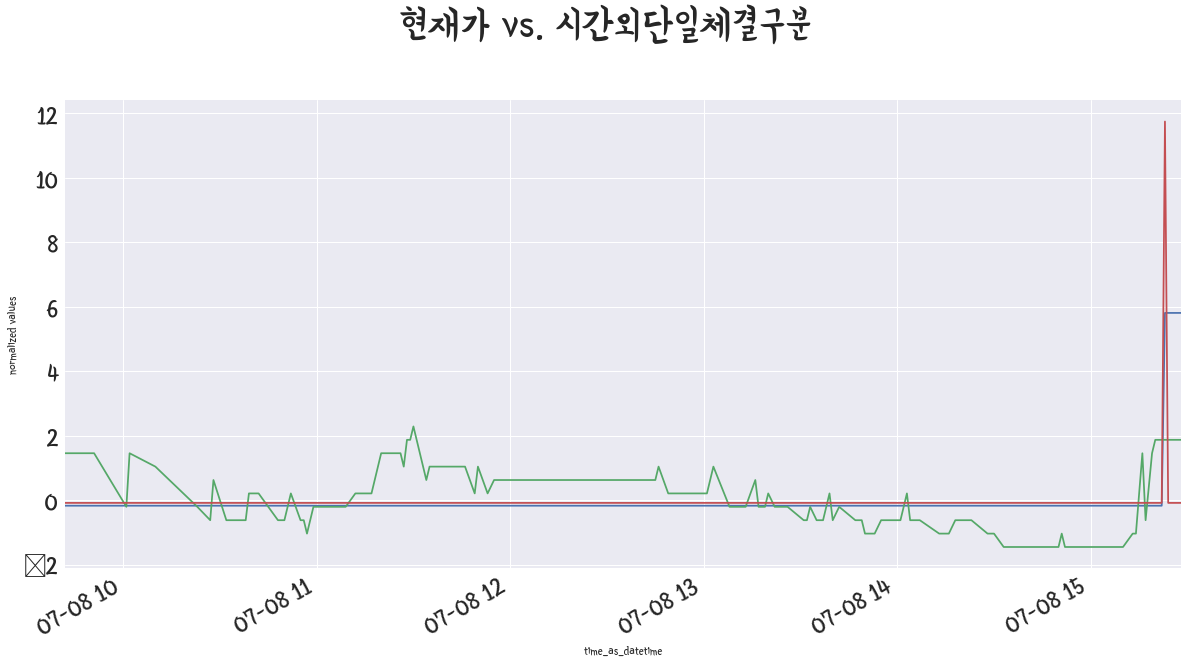

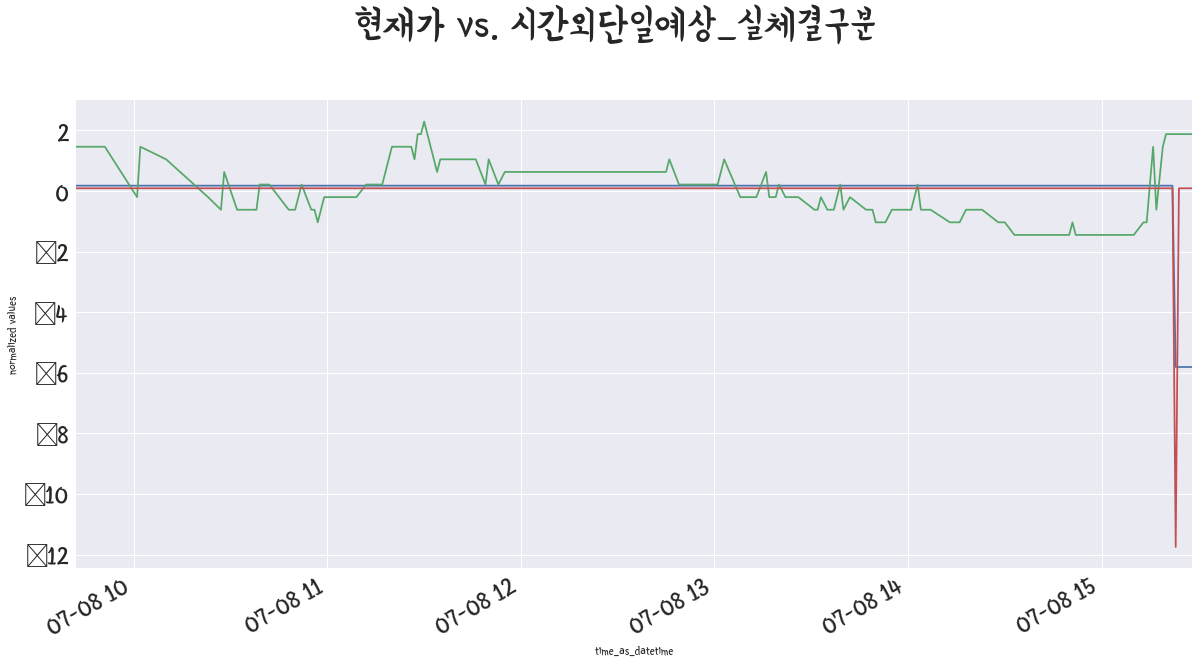

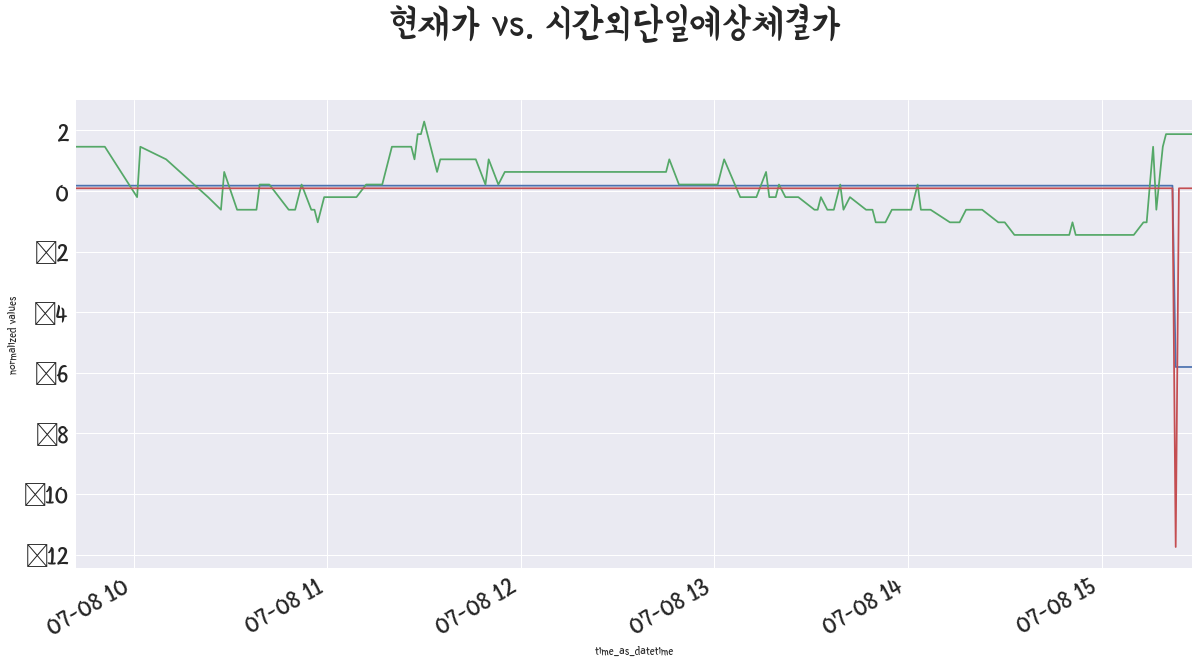

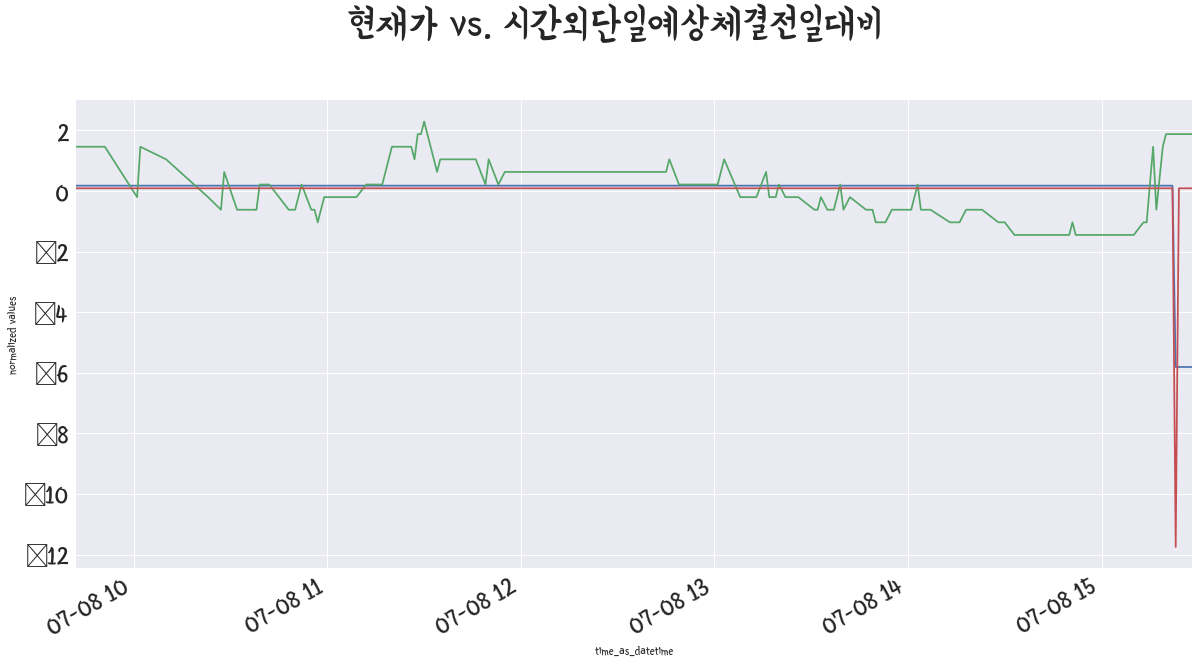

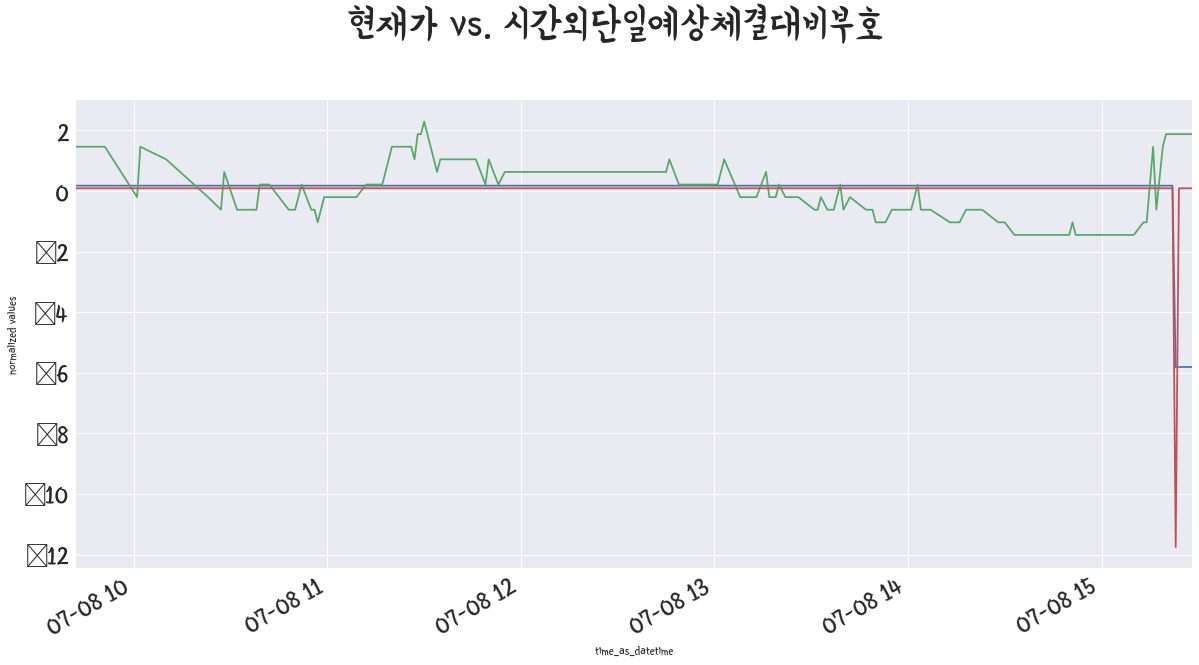

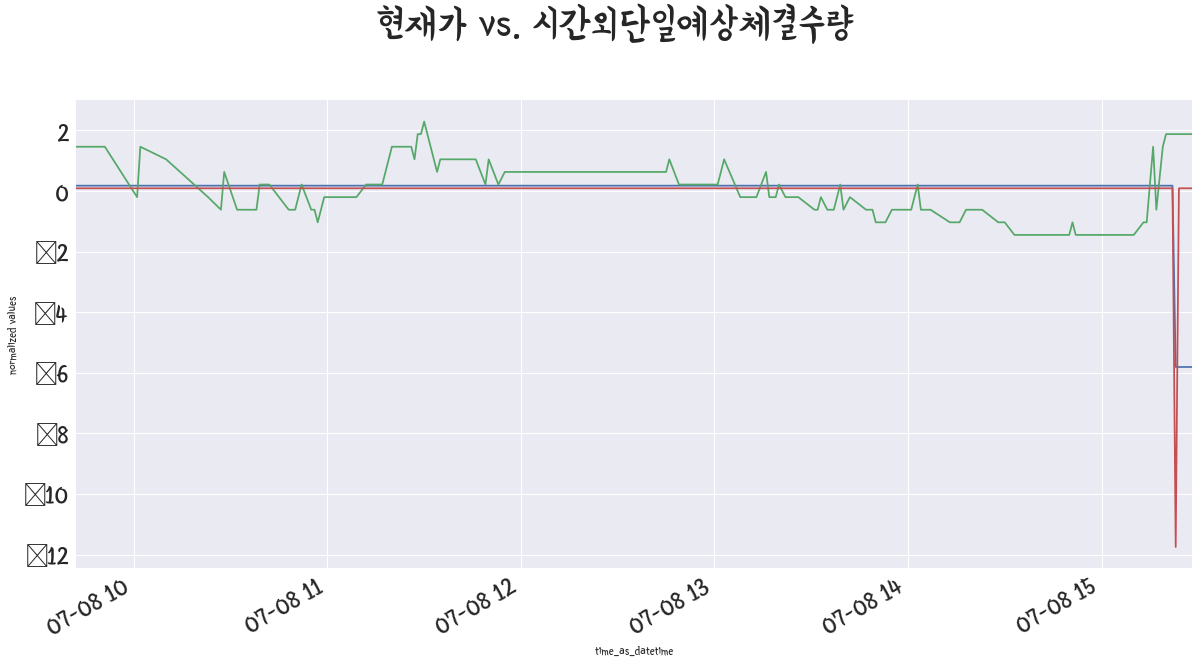

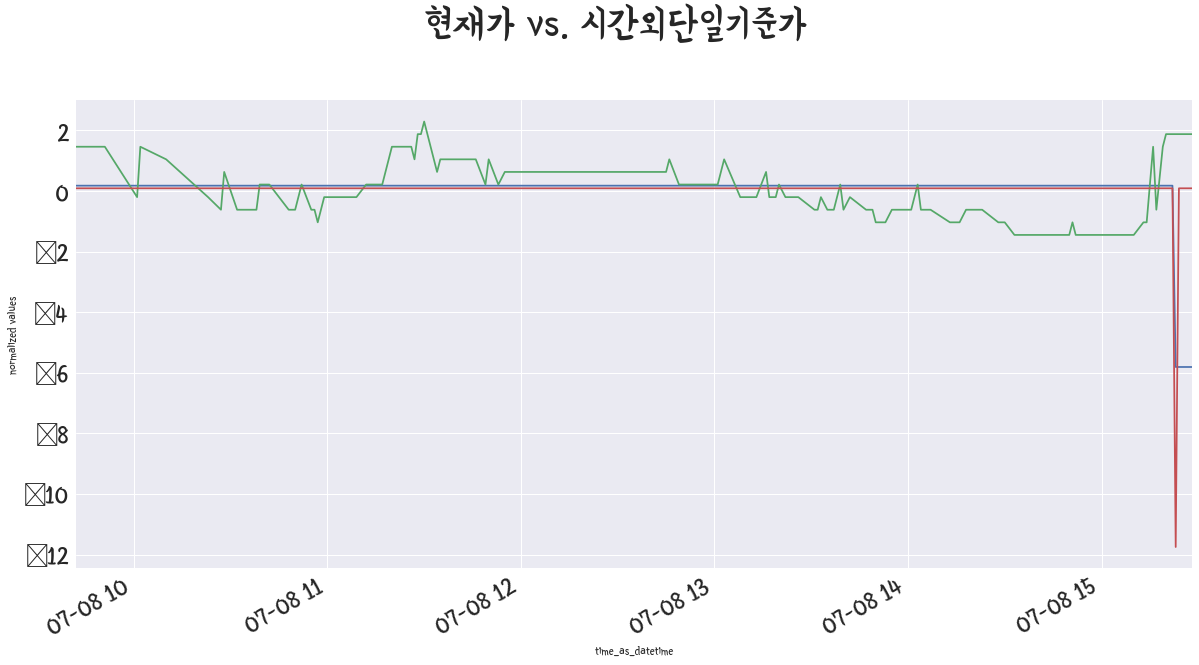

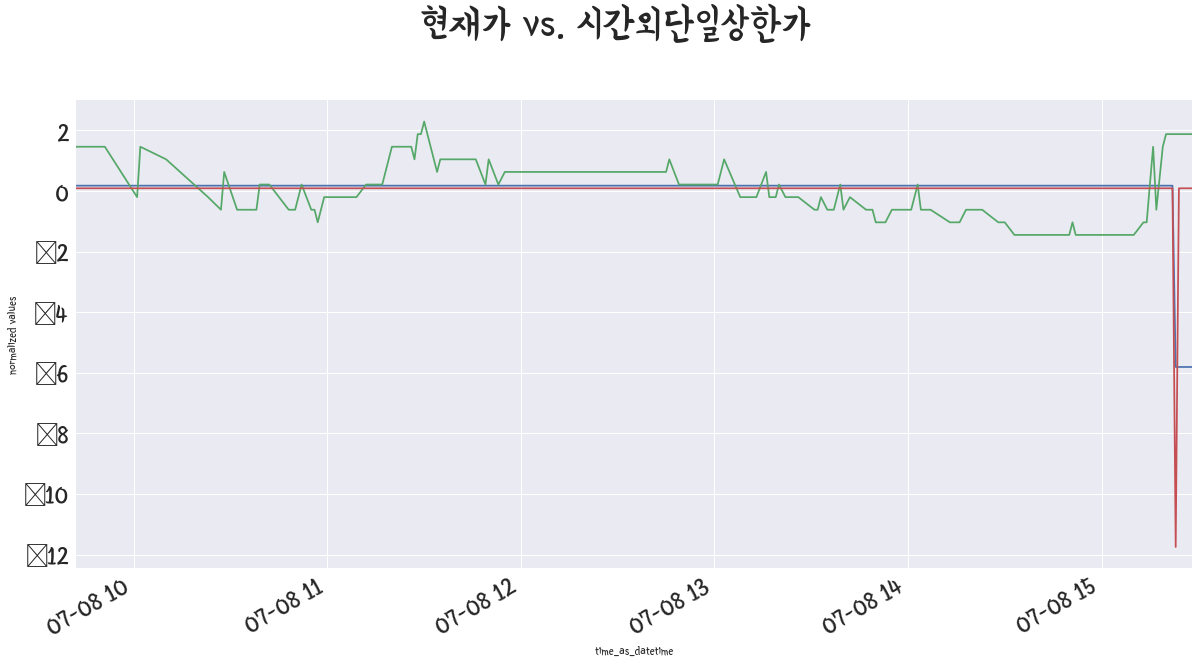

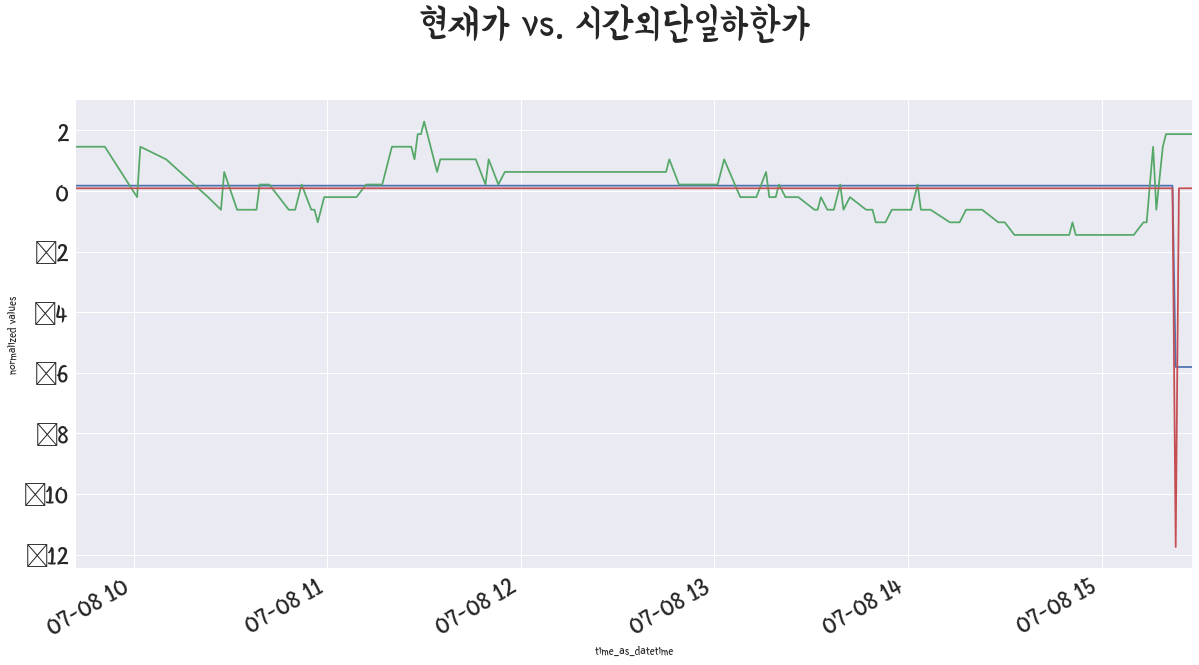

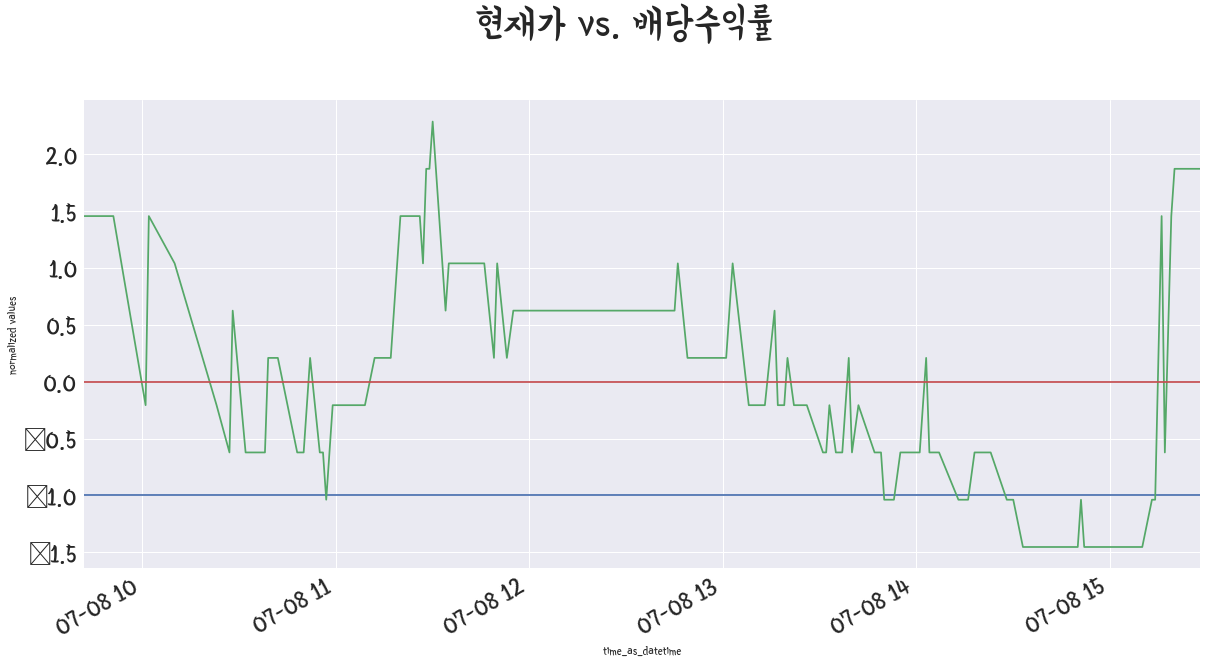

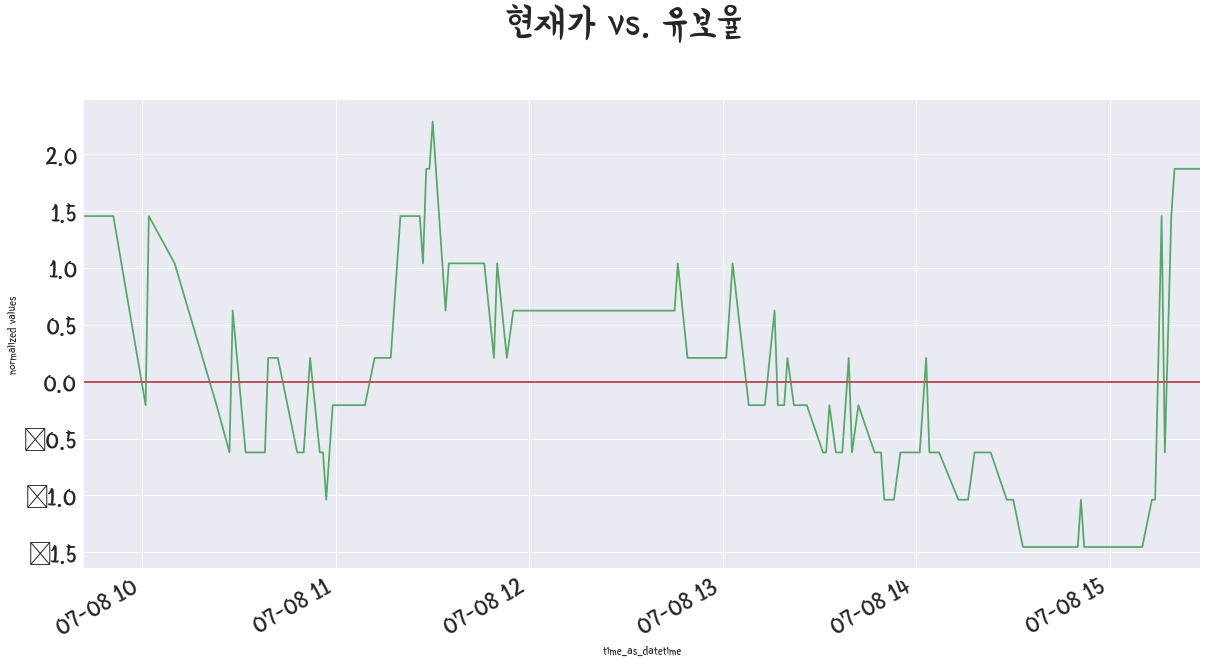

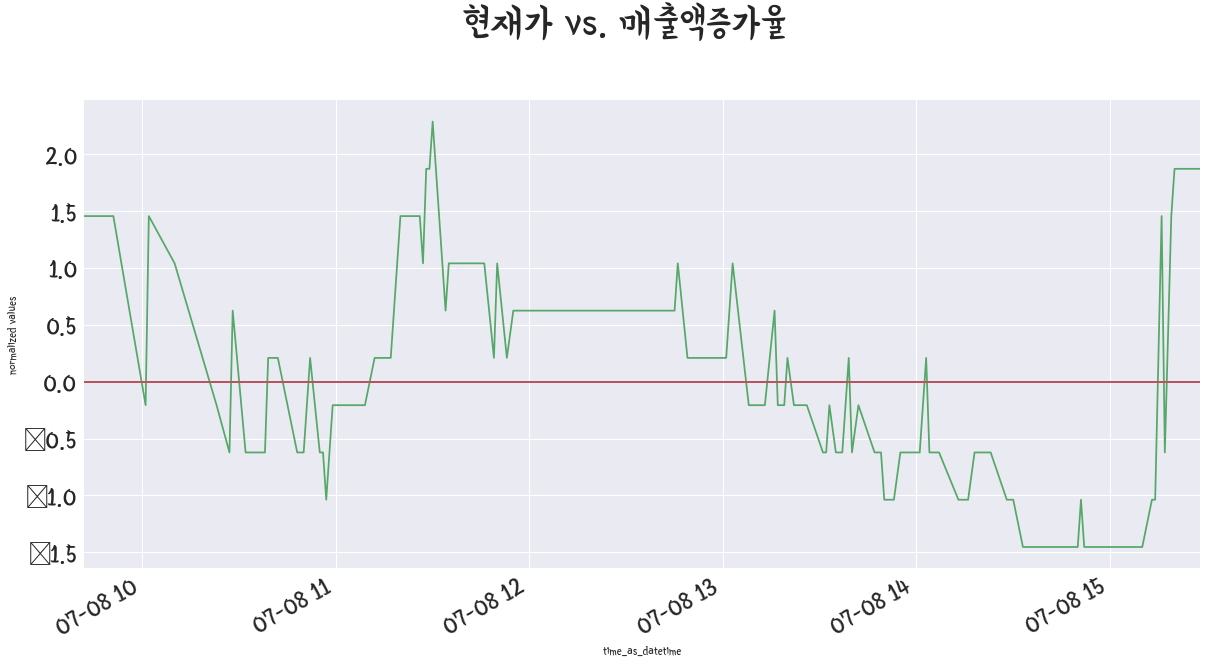

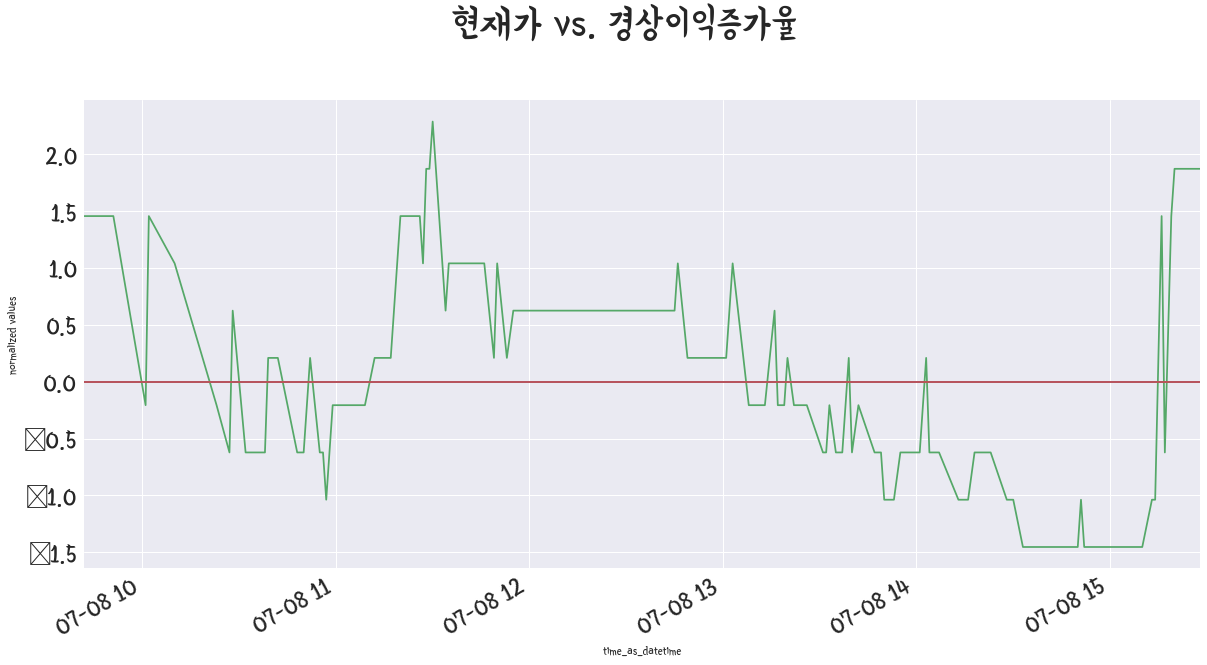

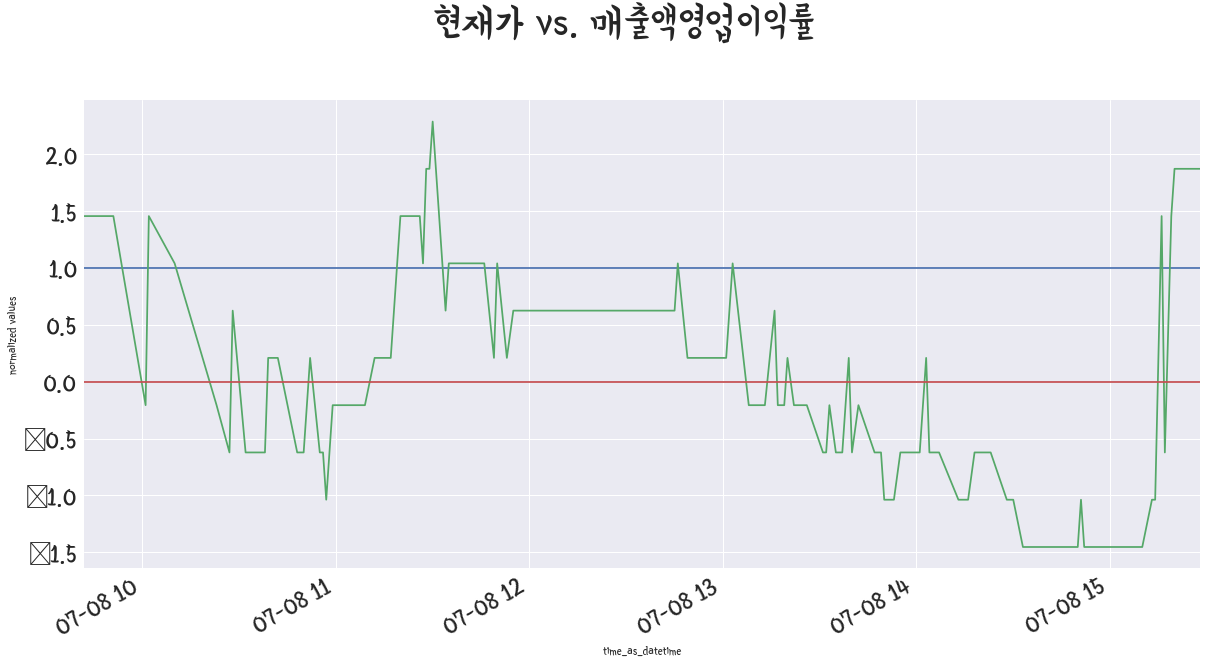

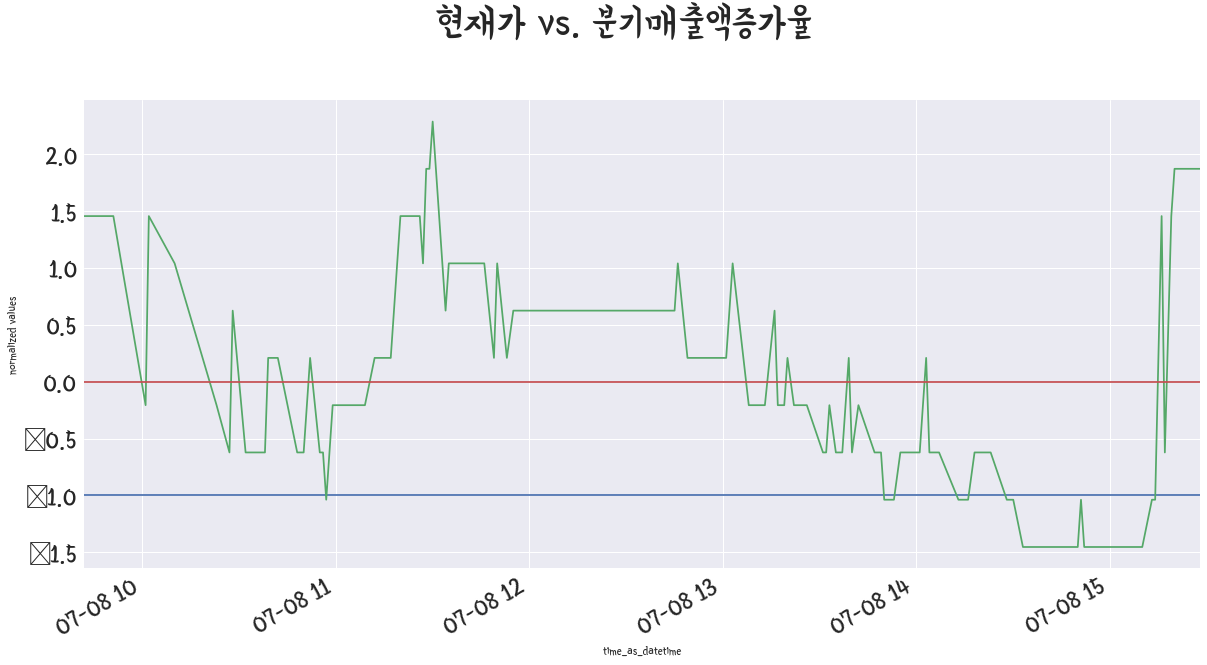

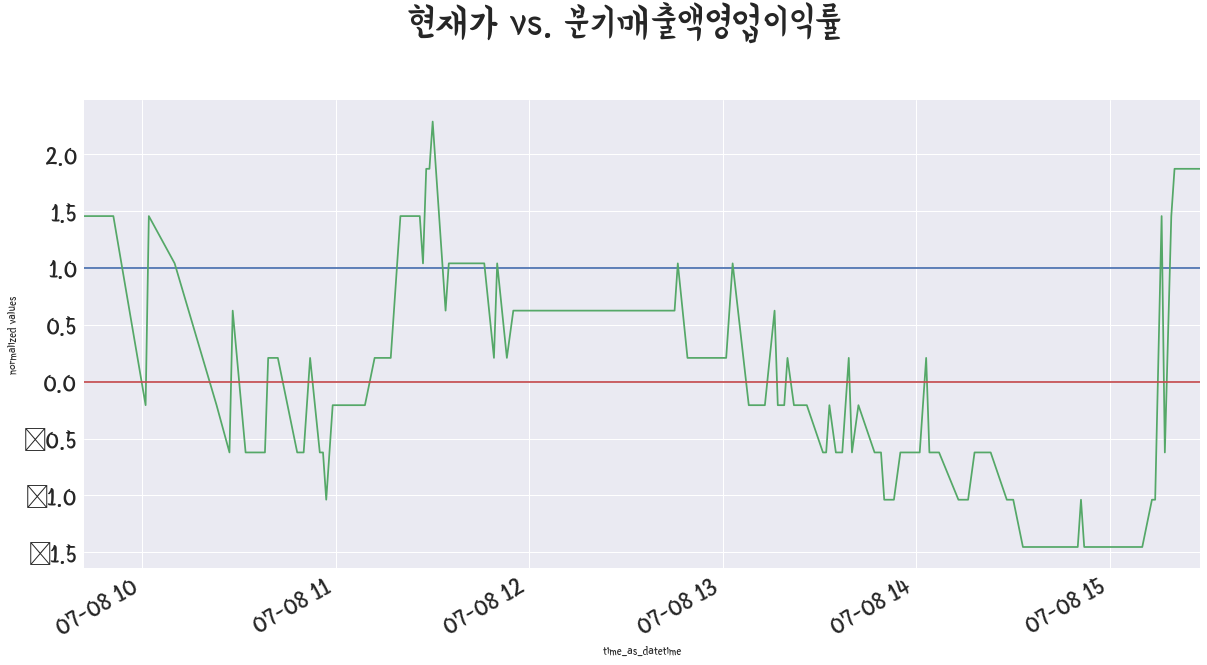

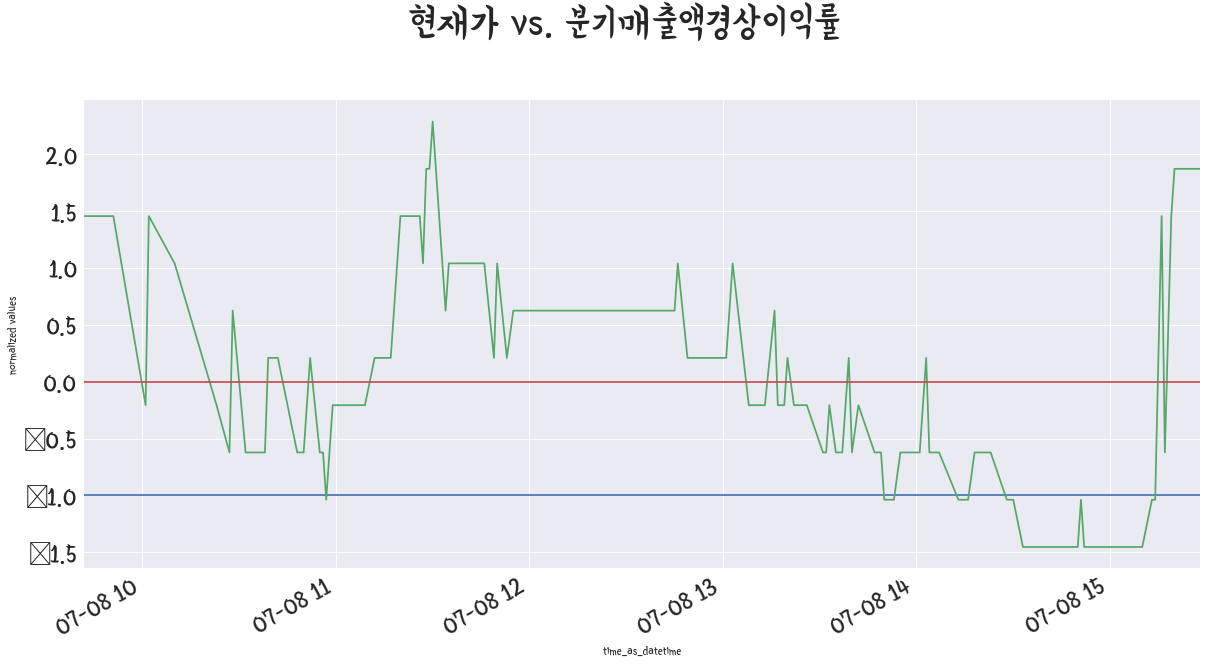

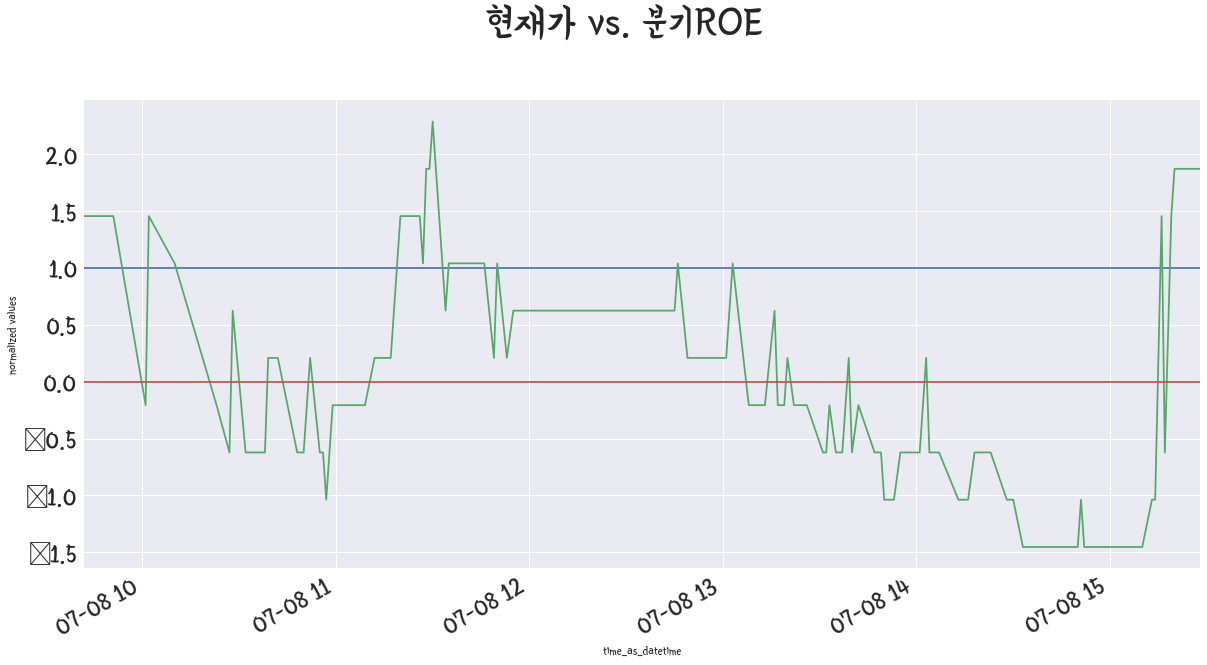

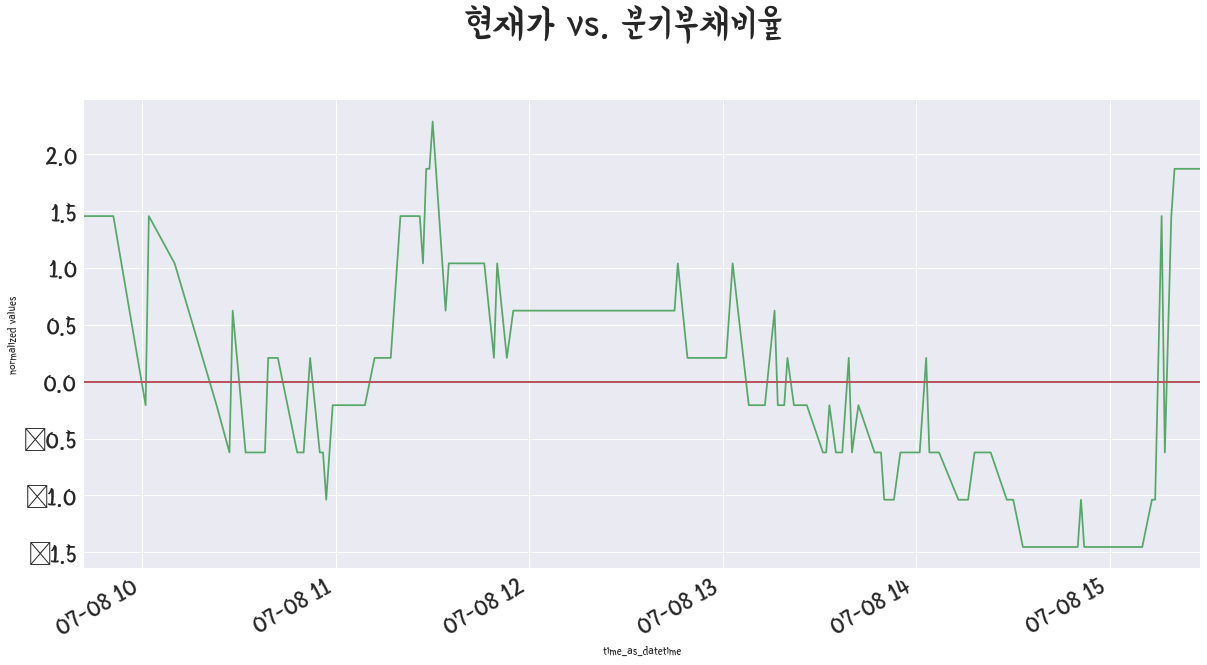

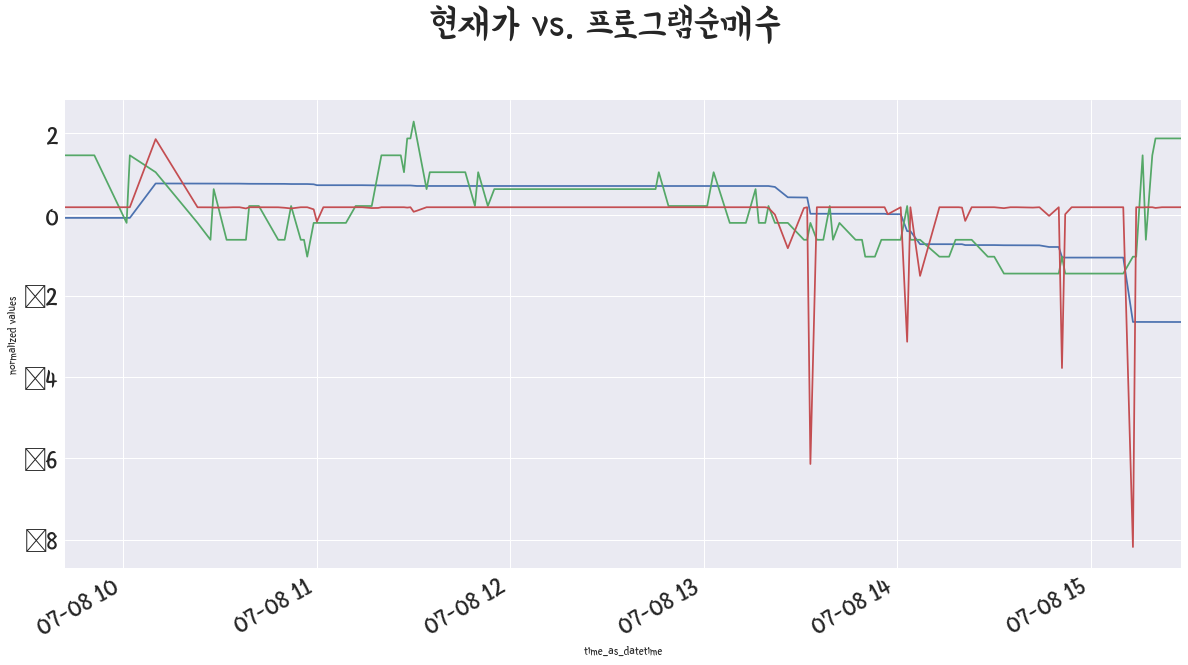

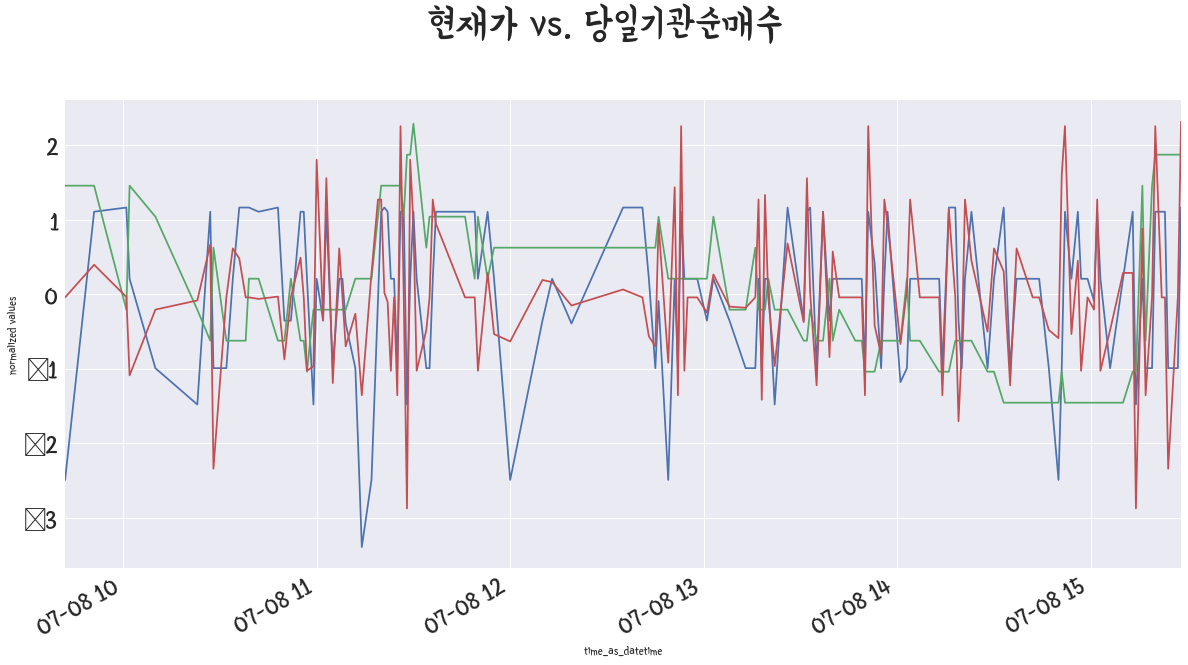

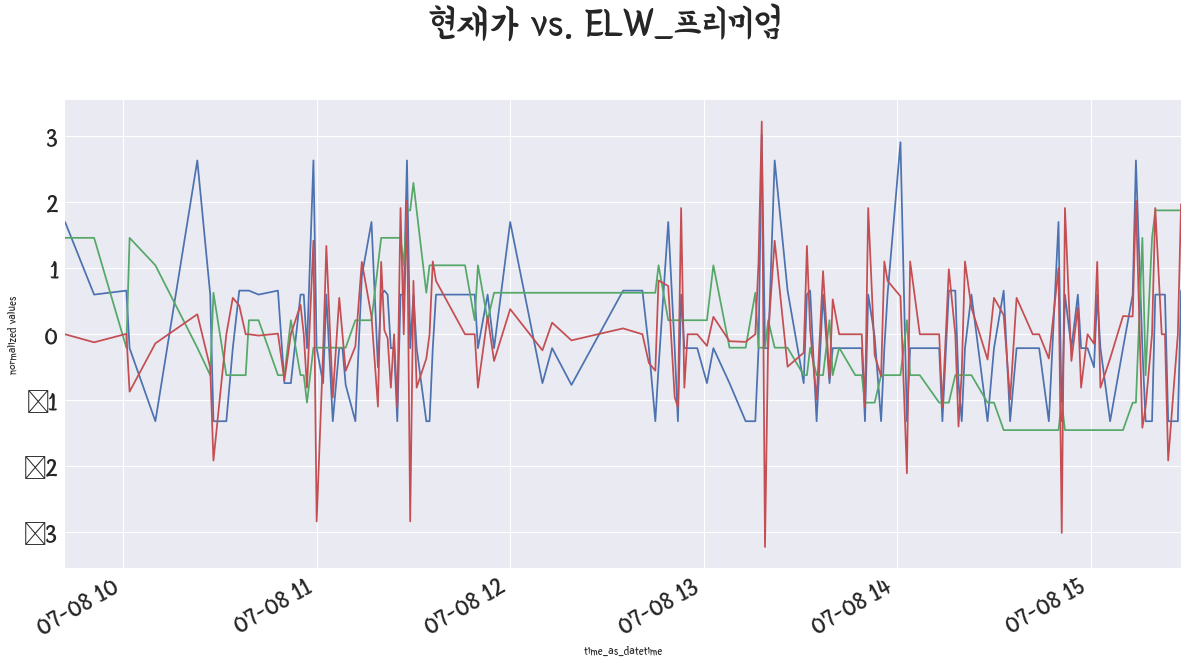

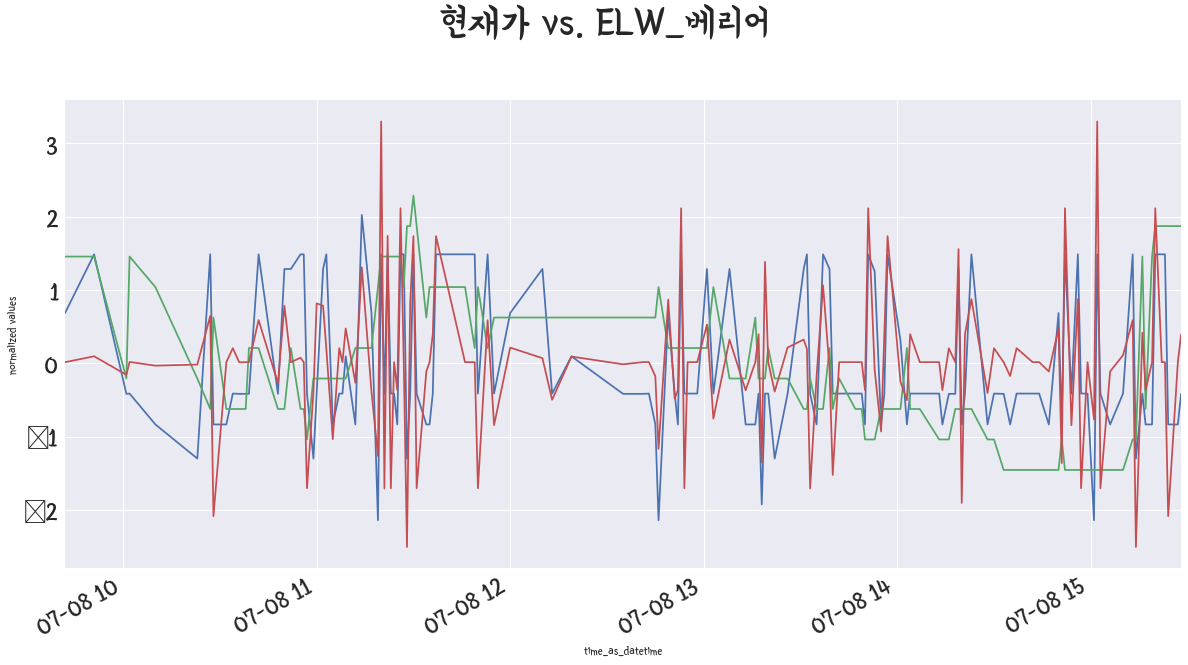

In [14]:
import pandas as pd
import numpy
import random as rnd
import time

code = df['종목코드'].iloc[rnd.randint(0, len(df))]
code_data = df[df['종목코드'] == code]
def f(x):
    x = '0000' if x == 0 else x
    return datetime.combine(date.today(), datetime.min.time()) + timedelta(hours=int(str(x)[:-2]), minutes=int(str(x)[-2:]))
code_data['time_as_datetime'] = code_data['시간'].apply(f)
plotter = code_data.set_index('time_as_datetime')
print("%s: %s" % (get_stock_name(code), code))
target = '현재가'
predictors = [c for c in df.columns.values if df[c].dtype in ('int64', 'float64')]

plt.rcParams["figure.figsize"] = (20,10)
for c in predictors:
    if c in ('time_as_datetime', '시간') or plotter[c].std() == 0:
        continue
    plotter, deriv_col_name = get_time_derivative(plotter, code, c)
    fig = mpl.pyplot.figure()
    title = r"%s vs. %s" % (target, c)
    fig.suptitle(title, fontsize=40, fontweight='bold')
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_xlabel('time')
    ax.set_ylabel('normalized values')
    ax.tick_params(axis='both', labelsize=25)
    plotter[c] = normalize_series(plotter[c])
    plotter[c].plot()
    plotter[target] = normalize_series(plotter[target])
    plotter[target].plot()
    plotter[deriv_col_name] = normalize_series(plotter[deriv_col_name])
    plotter[deriv_col_name].plot()

In [10]:
plotter.head(20)

종목코드    시간      대비부호      전일대비       현재가     시가  \
time_as_datetime                                                          
2017-07-08 09:48:00  A267290   948 -1.334986  0.893022  0.893022  50100   
2017-07-08 09:52:00  A267290   952  0.716677 -3.830933 -3.830933  50100   
2017-07-08 10:04:00  A267290  1004  0.716677 -0.051769 -0.051769  50100   
2017-07-08 10:10:00  A267290  1010 -1.334986  0.893022  0.893022  50100   
2017-07-08 10:16:00  A267290  1016  0.716677 -2.886142 -2.886142  50100   
2017-07-08 10:24:00  A267290  1024  0.716677 -2.886142 -2.886142  50100   
2017-07-08 10:31:00  A267290  1031 -1.334986  0.893022  0.893022  50100   
2017-07-08 10:33:00  A267290  1033  0.716677 -2.886142 -2.886142  50100   
2017-07-08 10:36:00  A267290  1036  0.716677 -0.051769 -0.051769  50100   
2017-07-08 10:38:00  A267290  1038  0.716677 -1.941351 -1.941351  50100   
2017-07-08 10:48:00  A267290  1048  0.716677 -0.051769 -0.051769  50100   
2017-07-08 10:49:00  A267290  1049  0.716677 -0.051769 -0.051769  50100   
2017-07-08 10:56:00  A267290  1056 -1.334986  0.893022  0.893022  50100   
2017-07-08 10:58:00  A267290  1058 -1.334986  0.893022  0.893022  50100   
2017-07-08 11:00:00  A267290  1100 -2.360818  1.837812  1.837812  50100   
2017-07-08 11:05:00  A267290  1105 -1.334986  0.893022  0.893022  50100   
2017-07-08 11:06:00  A267290  1106 -1.334986  0.893022  0.893022  50100   
2017-07-08 11:08:00  A267290  1108 -1.334986  0.893022  0.893022  50100   
2017-07-08 11:10:00  A267290  1110  0.716677 -0.051769 -0.051769  50100   
2017-07-08 11:11:00  A267290  1111  0.716677 -0.051769 -0.051769  50100   

                        고가     저가      매도호가      매수호가      ...       \
time_as_datetime                                           ...        
2017-07-08 09:48:00  50800  50100 -0.832390 -2.016741      ...        
2017-07-08 09:52:00  50800  50100 -0.832390 -2.998222      ...        
2017-07-08 10:04:00  50800  50100  0.903738  0.927701      ...        
2017-07-08 10:10:00  50800  50100  0.903738  0.927701      ...        
2017-07-08 10:16:00  50800  50100  0.903738 -2.016741      ...        
2017-07-08 10:24:00  50800  50100  0.903738 -2.016741      ...        
2017-07-08 10:31:00  50800  50100  0.903738 -2.016741      ...        
2017-07-08 10:33:00  50800  50100  0.903738 -2.016741      ...        
2017-07-08 10:36:00  50800  50100 -0.832390 -2.016741      ...        
2017-07-08 10:38:00  50800  50100 -2.568518 -1.035260      ...        
2017-07-08 10:48:00  50800  50100 -0.832390 -1.035260      ...        
2017-07-08 10:49:00  50800  50100  0.903738  0.927701      ...        
2017-07-08 10:56:00  50800  50100  0.903738  0.927701      ...        
2017-07-08 10:58:00  50800  50100  2.639866  0.927701      ...        
2017-07-08 11:00:00  50800  50100  2.639866  0.927701      ...        
2017-07-08 11:05:00  50800  50100  0.903738  0.927701      ...        
2017-07-08 11:06:00  50800  50100  0.903738  0.927701      ...        
2017-07-08 11:08:00  50800  50100  0.903738  0.927701      ...        
2017-07-08 11:10:00  50800  50100 -0.832390 -2.016741      ...        
2017-07-08 11:11:00  50800  50100 -0.832390 -2.016741      ...        

                     deriv_시간외단일SB구분여부  deriv_시간외단일기준가  deriv_시간외단일상한가  \
time_as_datetime                                                         
2017-07-08 09:48:00          -0.117851        0.117851        0.117851   
2017-07-08 09:52:00          -0.117851        0.117851        0.117851   
2017-07-08 10:04:00          -0.117851        0.117851        0.117851   
2017-07-08 10:10:00          -0.117851        0.117851        0.117851   
2017-07-08 10:16:00          -0.117851        0.117851        0.117851   
2017-07-08 10:24:00          -0.117851        0.117851        0.117851   
2017-07-08 10:31:00          -0.117851        0.117851        0.117851   
2017-07-08 10:33:00          -0.117851        0.117851        0.117851   
2017-07-08 10:36:00          -0.117851        0.117851        0.117851